## Discovery and Learning with Big Data/Machine Learning
### DeAundrie Howard
### Machine Learning Supervised Linear Regression

### Supervised Learning Workflow

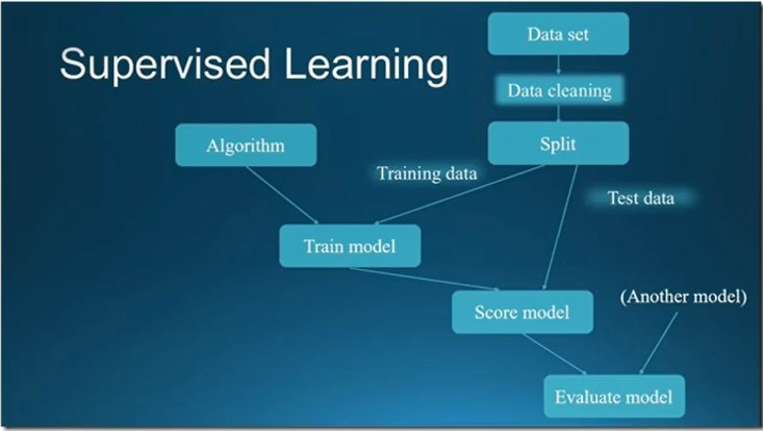
- You can see in this picture that supervised learning startw with the data set.  Remember since it is supervised, the data is labeled.  Then there is some data preprocessing (cleaning) to be done.  Next, you will declare your input (X/Indepentdent variables) and output (Target Variable/Dependent or Y) NumPy Arrays.  Then the data is split into a testing and training set.  Then you will build and train the model, use the model for predictions, and lastly, evaluate/validate the model.  So let's begin.

## <span style= 'color: red'>1. What is happening in the code block below? Enter your answer by adding a new code block and use markdown.</span>

Importing necessary python libraries and resources from pandas, numpy, sci-kit learn, seaborn, and matplotlib.

## <span style= 'color: red'>2. What is the Pandas libarary used for?  Enter your answer by adding a new code block and use markdown.</span> 

Pandas is used for data manipulation analysis.

##  <span style= 'color: red'>3. What is the Matplotlib library used for?  Enter your answer by adding a new code block and use markdown.</span>

Matplotlib is used for data visualization, such as plotting.

## <span style= 'color: red'>4. What is the Seaborn library used for?  Enter your answer by adding a new code block and use markdown.</span>

Seaborn builds on Matplotlib in regards data visualization with greater emphasis on statical graphic representation through a high-level interface.

In [223]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

### Description of Boston Housing Dataset ['https://www.kaggle.com/c/boston-housing']

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per 10,000 dollars
- PTRATIO: This is the pupil-teacher ratio by town
- AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

##  <span style= 'color: red'>5. What is happening in the code block below question 6? Enter your answer by adding a new code block and use markdown.</span>

In code block six (6), the Boston Housing market is being loaded/imported into python and assigned to a DataFrame.

##  <span style= 'color: red'>6. What is the dataset that is loading?  Enter your answer by adding a new code block and use markdown.</span>

The dataset that is being loaded is the Boston Housing Market - 'housing_boston.csv.'

In [224]:
# Specify location of the dataset.  
housingfile = 'housing_boston.csv'

In [225]:
# Load the data into a Pandas DataFrame
df= pd.read_csv (housingfile, header=None)

## <span style= 'color: red'>7. What is the df.head() used for?  Enter your answer by adding a new code block and use markdown.</span>

The df.head() is used to return the first five (5) records of a given DataFrame to give a brief overview of the dataset by showing column headers, indices, and respecitve values.

In [226]:
df.head()

0      1     2   3     4     5      6     7   8    9      10      11  \
0 0.006 18.000 2.310   0 0.538 6.575 65.200 4.090   1  296 15.300 396.900   
1 0.027  0.000 7.070   0 0.469 6.421 78.900 4.967   2  242 17.800 396.900   
2 0.027  0.000 7.070   0 0.469 7.185 61.100 4.967   2  242 17.800 392.830   
3 0.032  0.000 2.180   0 0.458 6.998 45.800 6.062   3  222 18.700 394.630   
4 0.069  0.000 2.180   0 0.458 7.147 54.200 6.062   3  222 18.700 396.900   

     12     13  
0 4.980 24.000  
1 9.140 21.600  
2 4.030 34.700  
3 2.940 33.400  
4 5.330 36.200

In [227]:
# Give names to the columns since there are no headers.
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

## <span style= 'color: red'>8. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

The code block below is assignin the colums names of the DataFrame to the created variable 'col_name,' which gave the columns headers.

In [228]:
df.columns = col_names

## <span style= 'color: red'>9. What happens when the head () function is called?</span>

When the df.head() is called, it return the first five (5) records of the dataset with the newly assigned column headers.

In [229]:
df.head()

CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO  \
0 0.006 18.000  2.310     0 0.538 6.575 65.200 4.090    1  296   15.300   
1 0.027  0.000  7.070     0 0.469 6.421 78.900 4.967    2  242   17.800   
2 0.027  0.000  7.070     0 0.469 7.185 61.100 4.967    2  242   17.800   
3 0.032  0.000  2.180     0 0.458 6.998 45.800 6.062    3  222   18.700   
4 0.069  0.000  2.180     0 0.458 7.147 54.200 6.062    3  222   18.700   

       AA  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200

## Preprocess the Dataset

## <span style= 'color: red'>10. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

In the code below, it will return the sum of null values (does not contain an integer or proper value) within each category or column.

In [230]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

## Performing the Exploratory Data Analysis (EDA)

## <span style= 'color:red'> 11.  What happens when the df.shape function is called? Enter your answer by adding a new code block and use markdown. </span>

When the df.shape function is called, it will return the dimensions of the datasets - it will return the rows and columns of a data in form of (rows, columns).

In [231]:
print(df.shape)

(452, 14)


## <span style= 'color:red'> 12.  What happens when the df.dtypes function is called?  Enter your answer by adding a new code block and use markdown. </span>

When the df.types function is called, it will return the data type of each category or column.

In [232]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


## <span style= 'color:red'> 13.  What happens when the df.describe () is called?  Enter your answer by adding a new code block and use markdown. </span>

When the df.described() is called, it will return the statistical summary (e.g., mean, median, mode, etc) of each category/column within a given dataset.

In [233]:
print(df.describe())

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count 452.000 452.000 452.000 452.000 452.000 452.000 452.000 452.000 452.000   
mean    1.421  12.721  10.305   0.077   0.541   6.344  65.558   4.044   7.823   
std     2.496  24.326   6.797   0.268   0.114   0.667  28.127   2.090   7.543   
min     0.006   0.000   0.460   0.000   0.385   3.561   2.900   1.130   1.000   
25%     0.070   0.000   4.930   0.000   0.447   5.927  40.950   2.355   4.000   
50%     0.191   0.000   8.140   0.000   0.519   6.229  71.800   3.550   5.000   
75%     1.211  20.000  18.100   0.000   0.605   6.635  91.625   5.401   7.000   
max     9.967 100.000  27.740   1.000   0.871   8.780 100.000  12.127  24.000   

          TAX  PTRATIO      AA   LSTAT    MEDV  
count 452.000  452.000 452.000 452.000 452.000  
mean  377.442   18.247 369.827  11.442  23.750  
std   151.328    2.200  68.554   6.156   8.809  
min   187.000   12.600   0.320   1.730   6.300  
25%   276.750   16.800 37

## <span style= 'color:red'> 14.  What happens when the df.hist function is called?  Enter your answer by adding a new code block and use markdown. </span>

When the df.hist() function is called, it will create and display a histogram with the given parameters (e.g., color, figure size, bin size, etc.) of a given dataset.

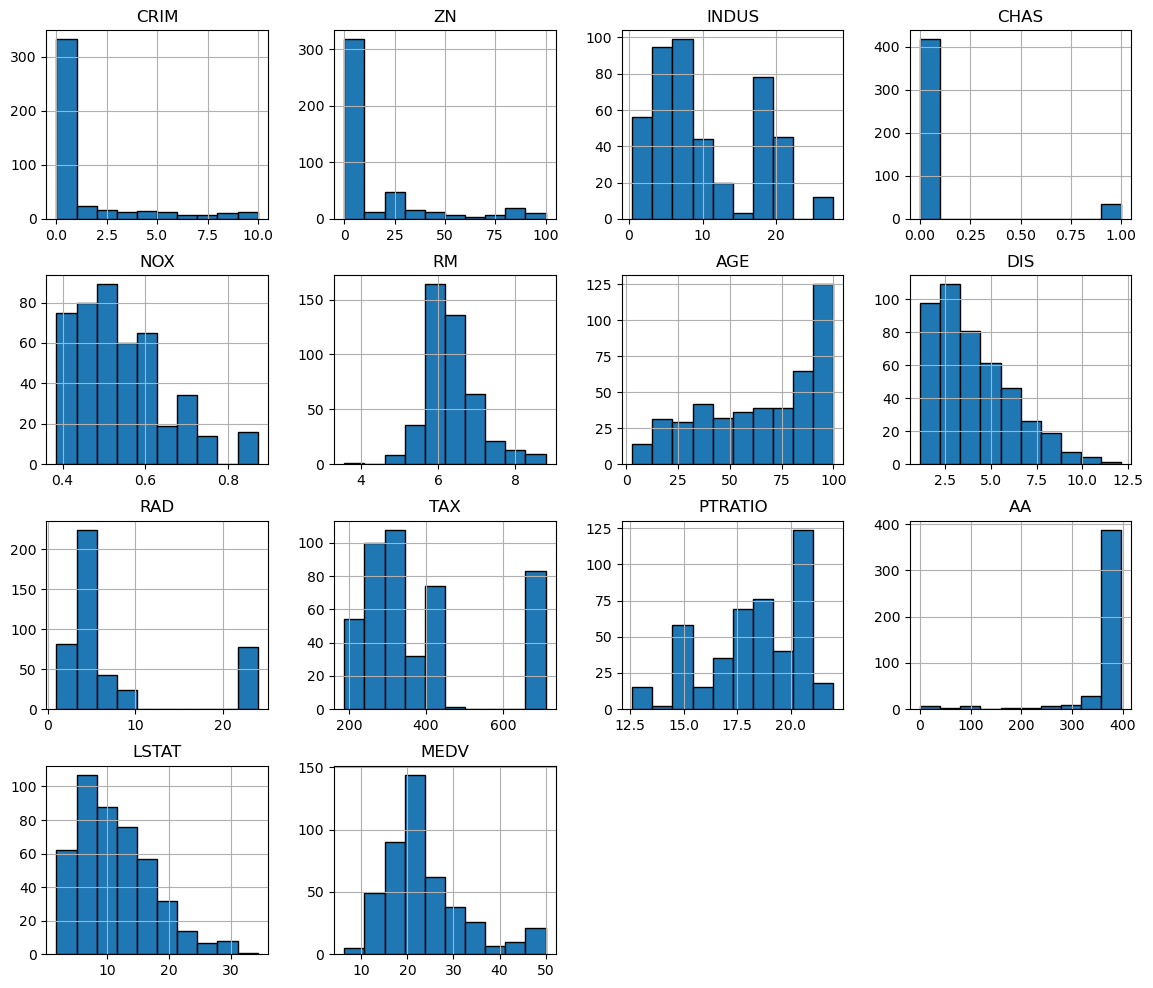

In [234]:
# I encourage you to change some of the parameters. 
#Remember what you did in the previous homework.
df.hist(edgecolor= 'black',figsize=(14,12), bins= 10)
plt.show()

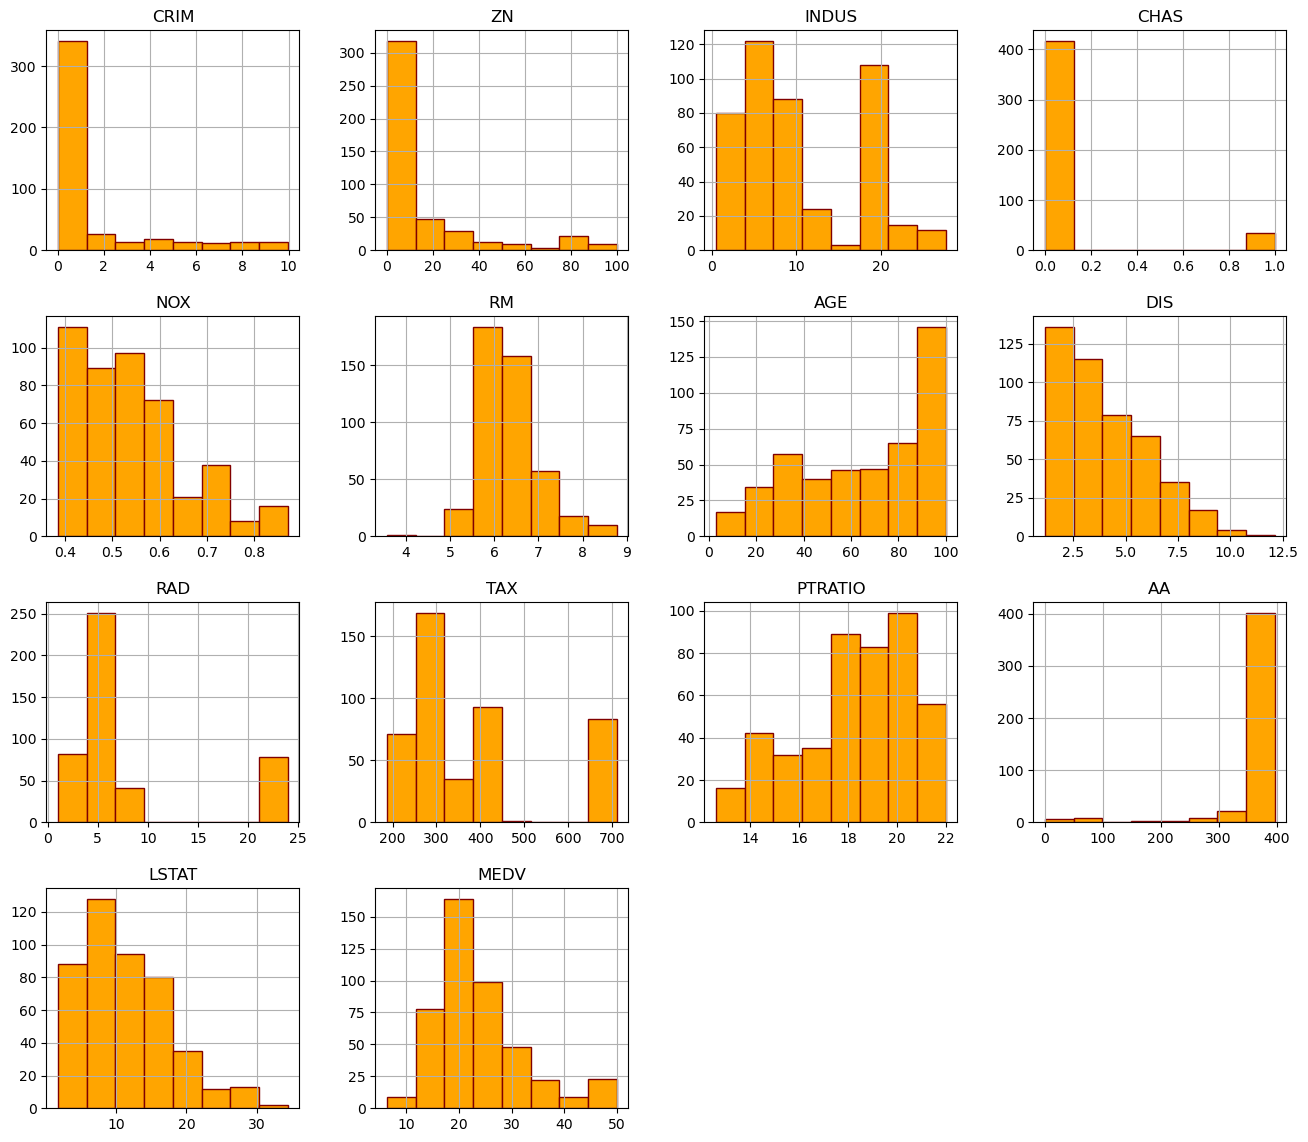

In [235]:
df.hist(color = 'orange', edgecolor= 'maroon', figsize = (16,14), bins  = 8)
plt.show()

## <span style= 'color:red'> 15. Create a new code block below and change the bins to 15 and the figsize to 18 x 18. Be sure to run the code.  </span>

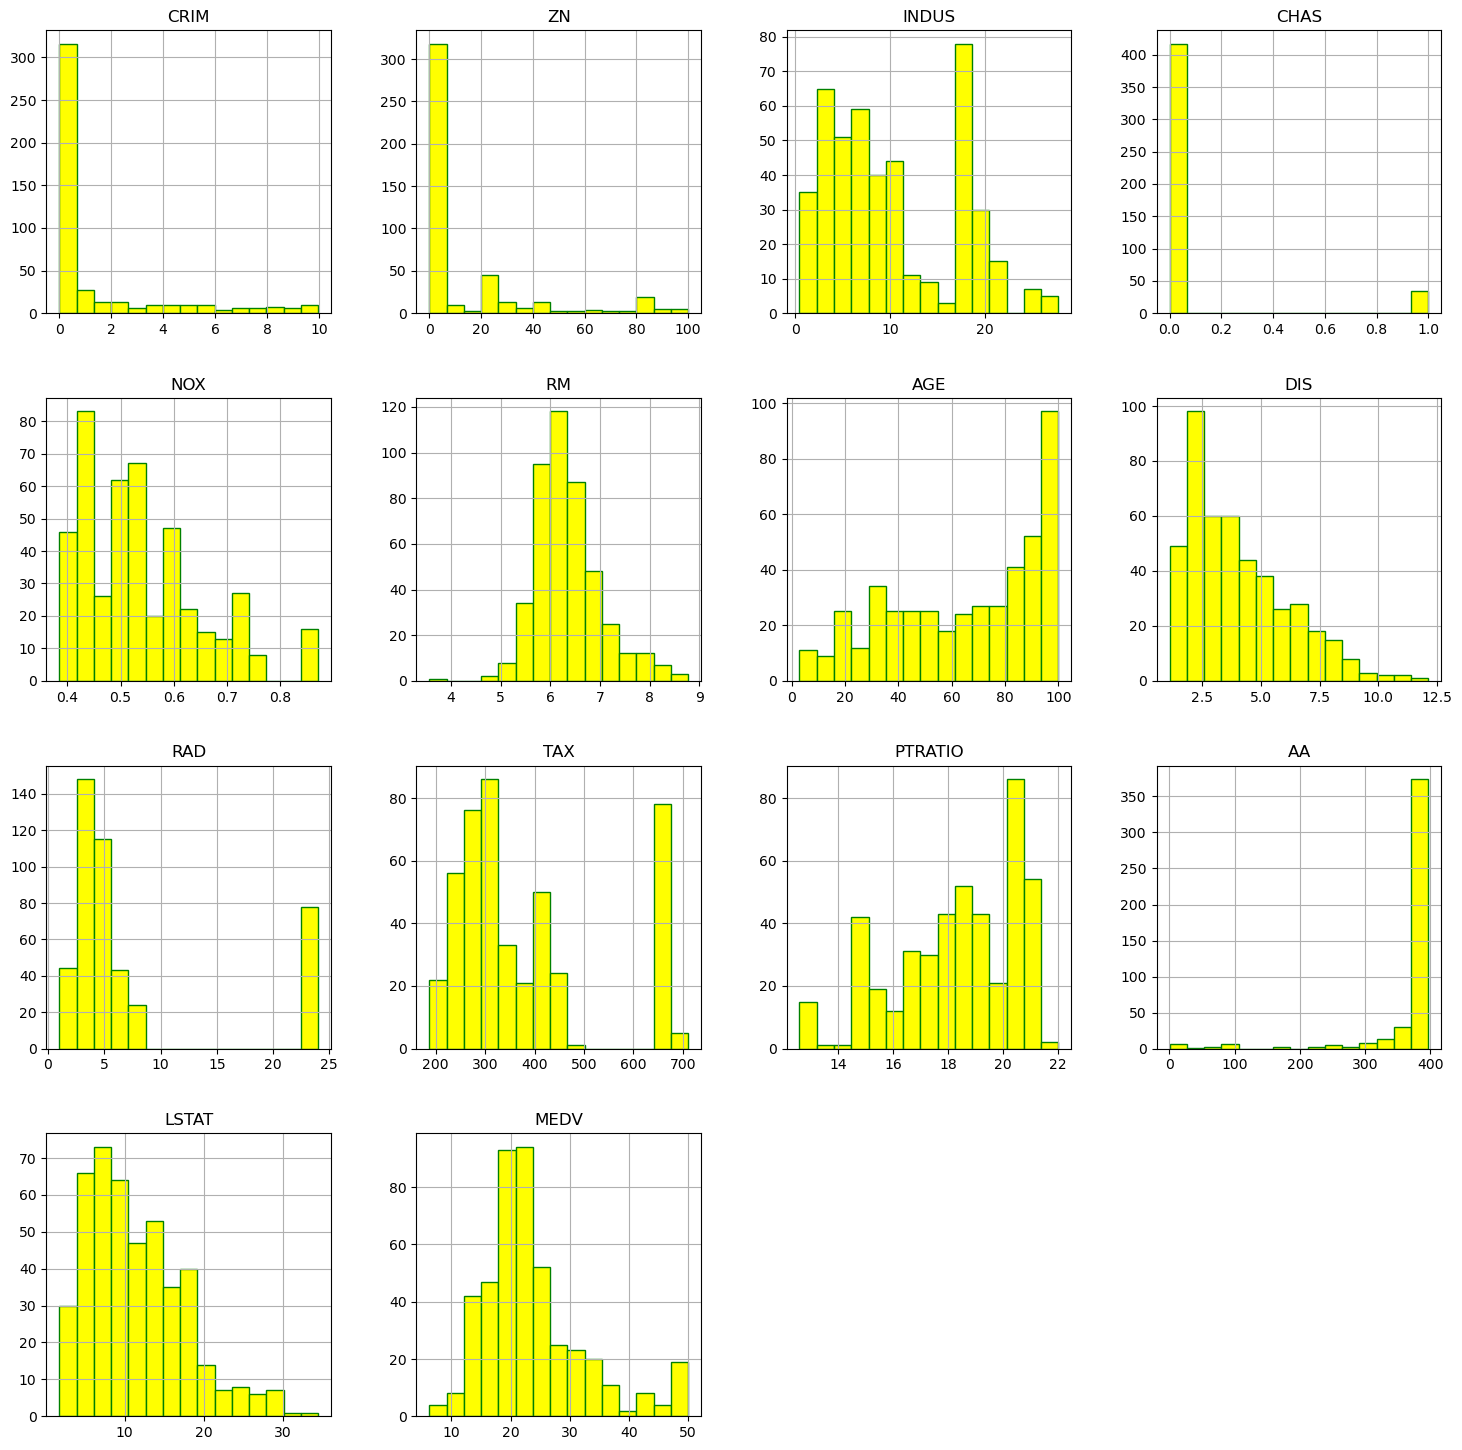

In [236]:
df.hist(color = 'yellow', edgecolor= 'green', figsize = (18,18), bins = 15)
plt.show()

## <span style= 'color:red'> 16. What happens when the df.plot function is called?  Enter your answer by adding a new code block and use markdown. </span>

When the df.plot() is called, it creates and plots/displays visualization of each category of given dataset based on the desired parameteres (e.g., kind = 'scatter', fonsize = 14, etc.).

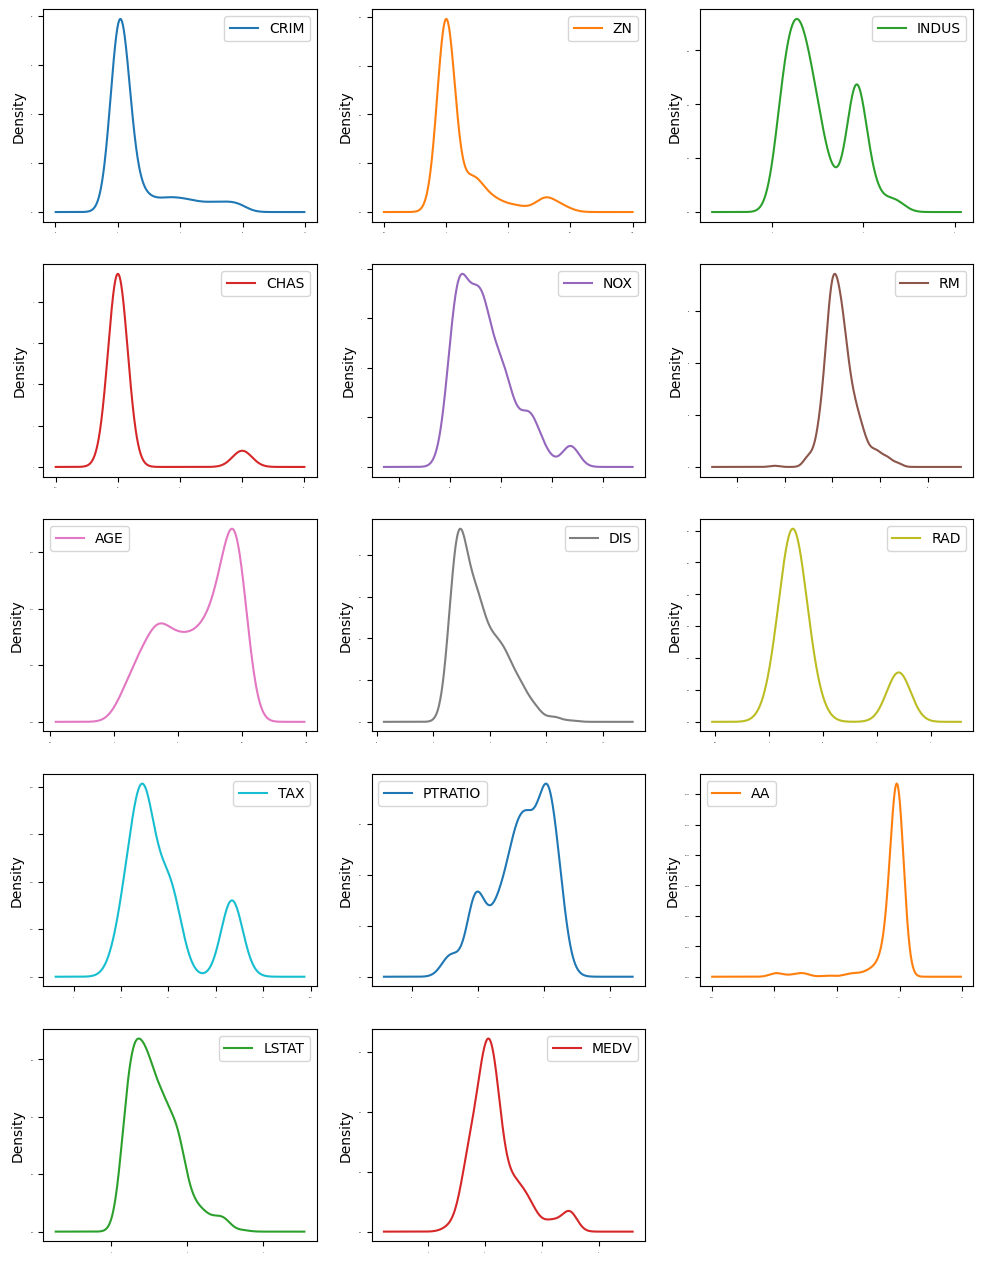

In [237]:
# Notes:  14 numeric variable, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots
df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

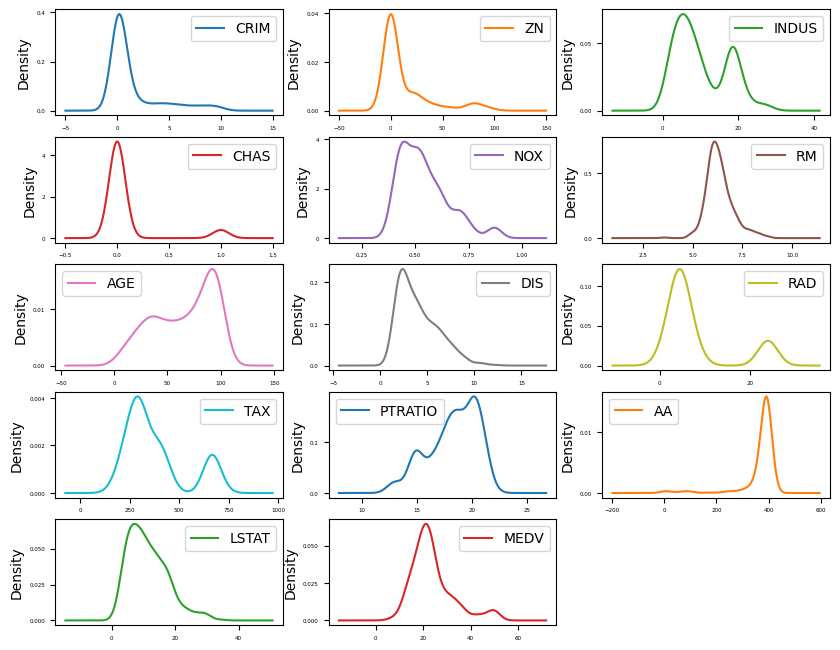

In [238]:
df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=4, figsize= (10,8))
plt.show()

### Creating a Box Plot

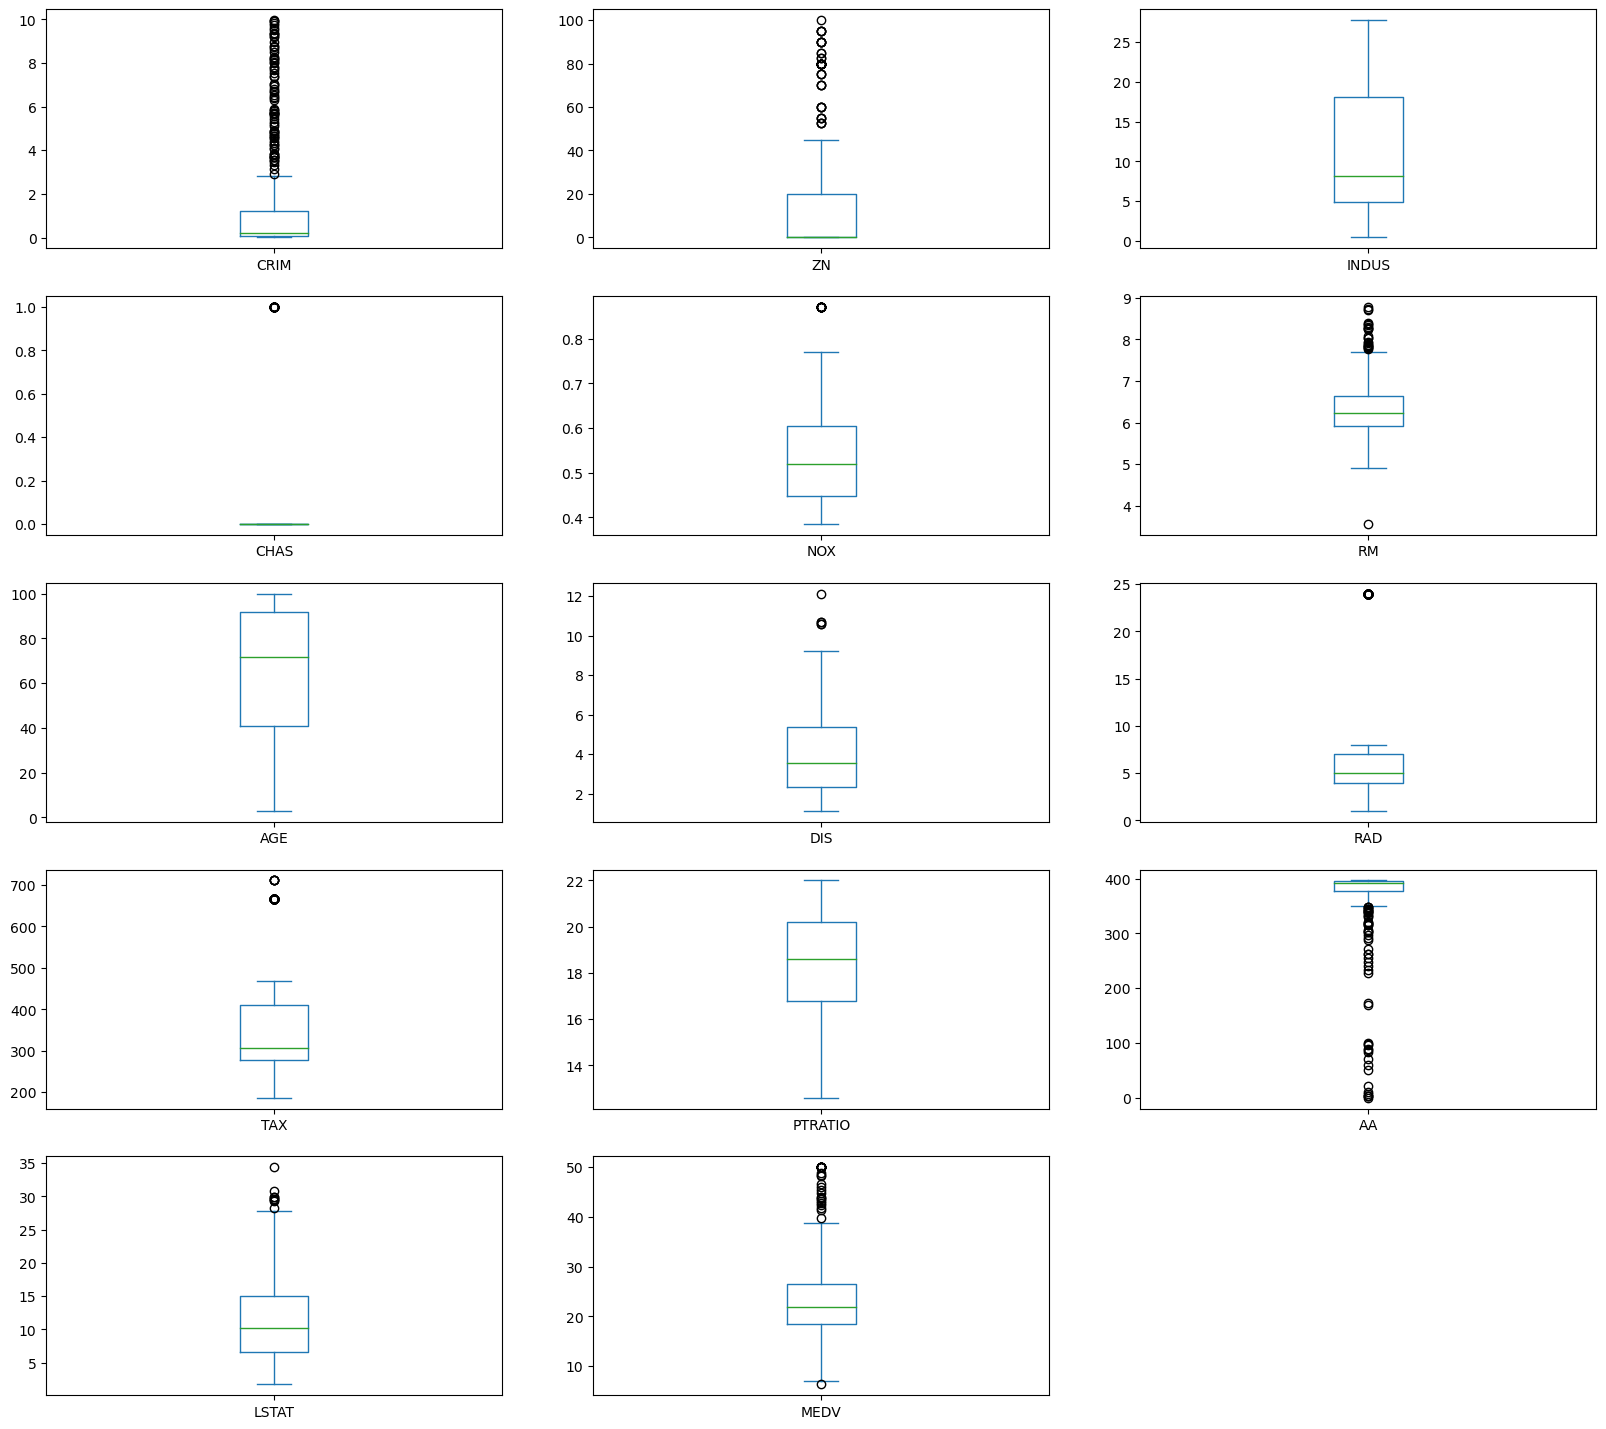

In [239]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

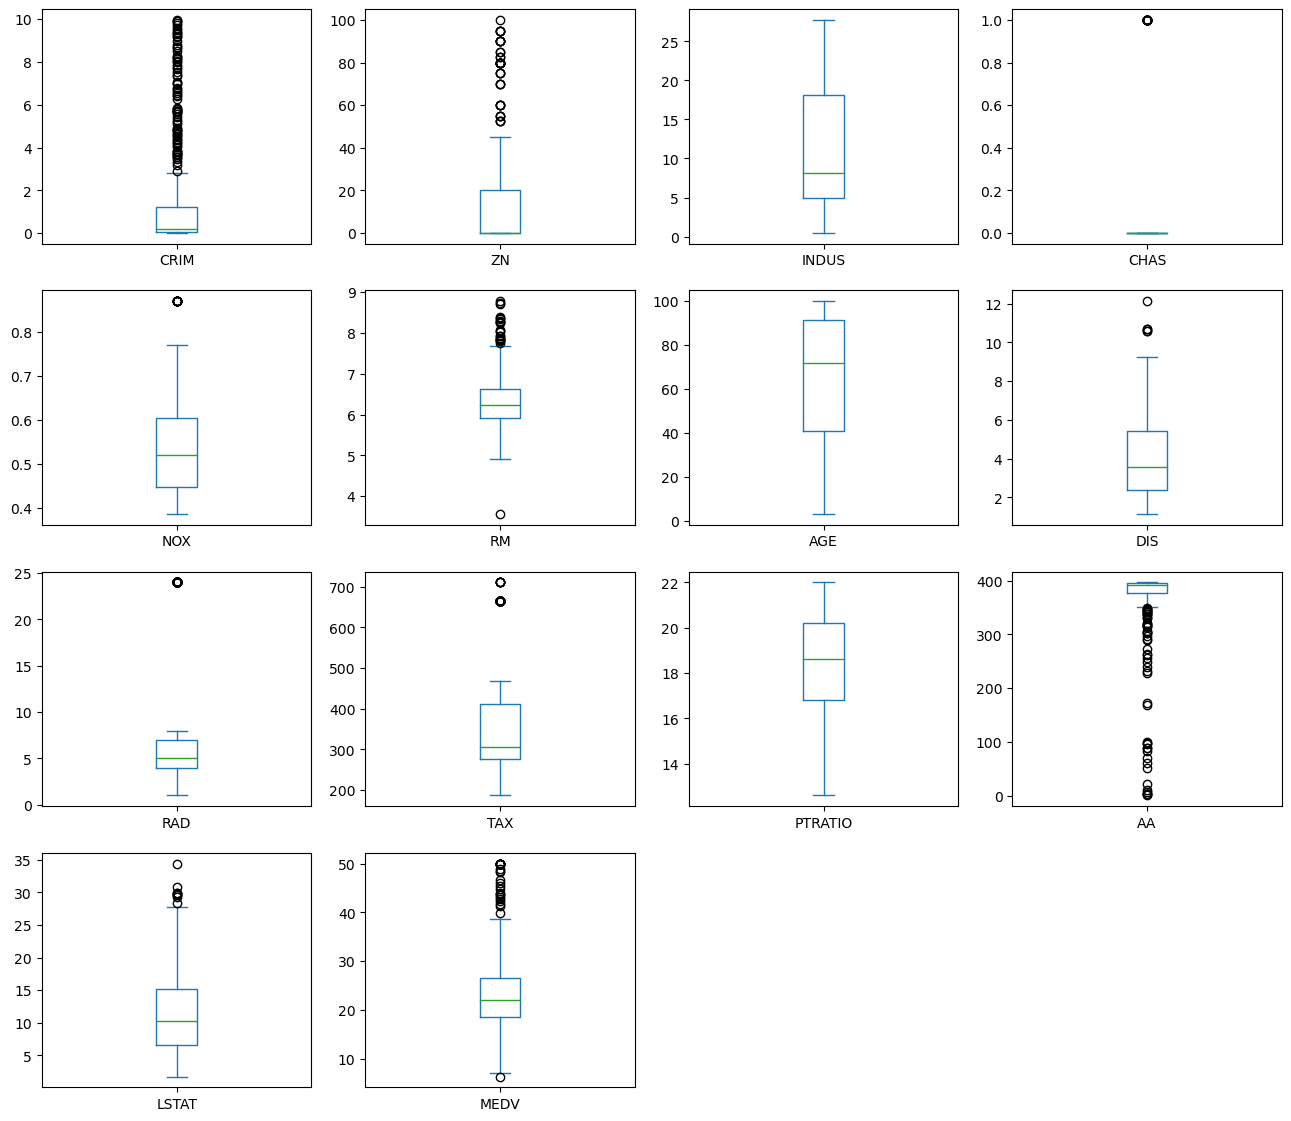

In [240]:
df.plot(kind="box", subplots=True, layout=(4,4), sharex=False, figsize=(16,14))
plt.show()

## <span style= 'color:red'> 17. Create a new code block below and change the boxpot layout to 2,7 and the figsize to 22 x 22. Be sure to run the code.  </span>

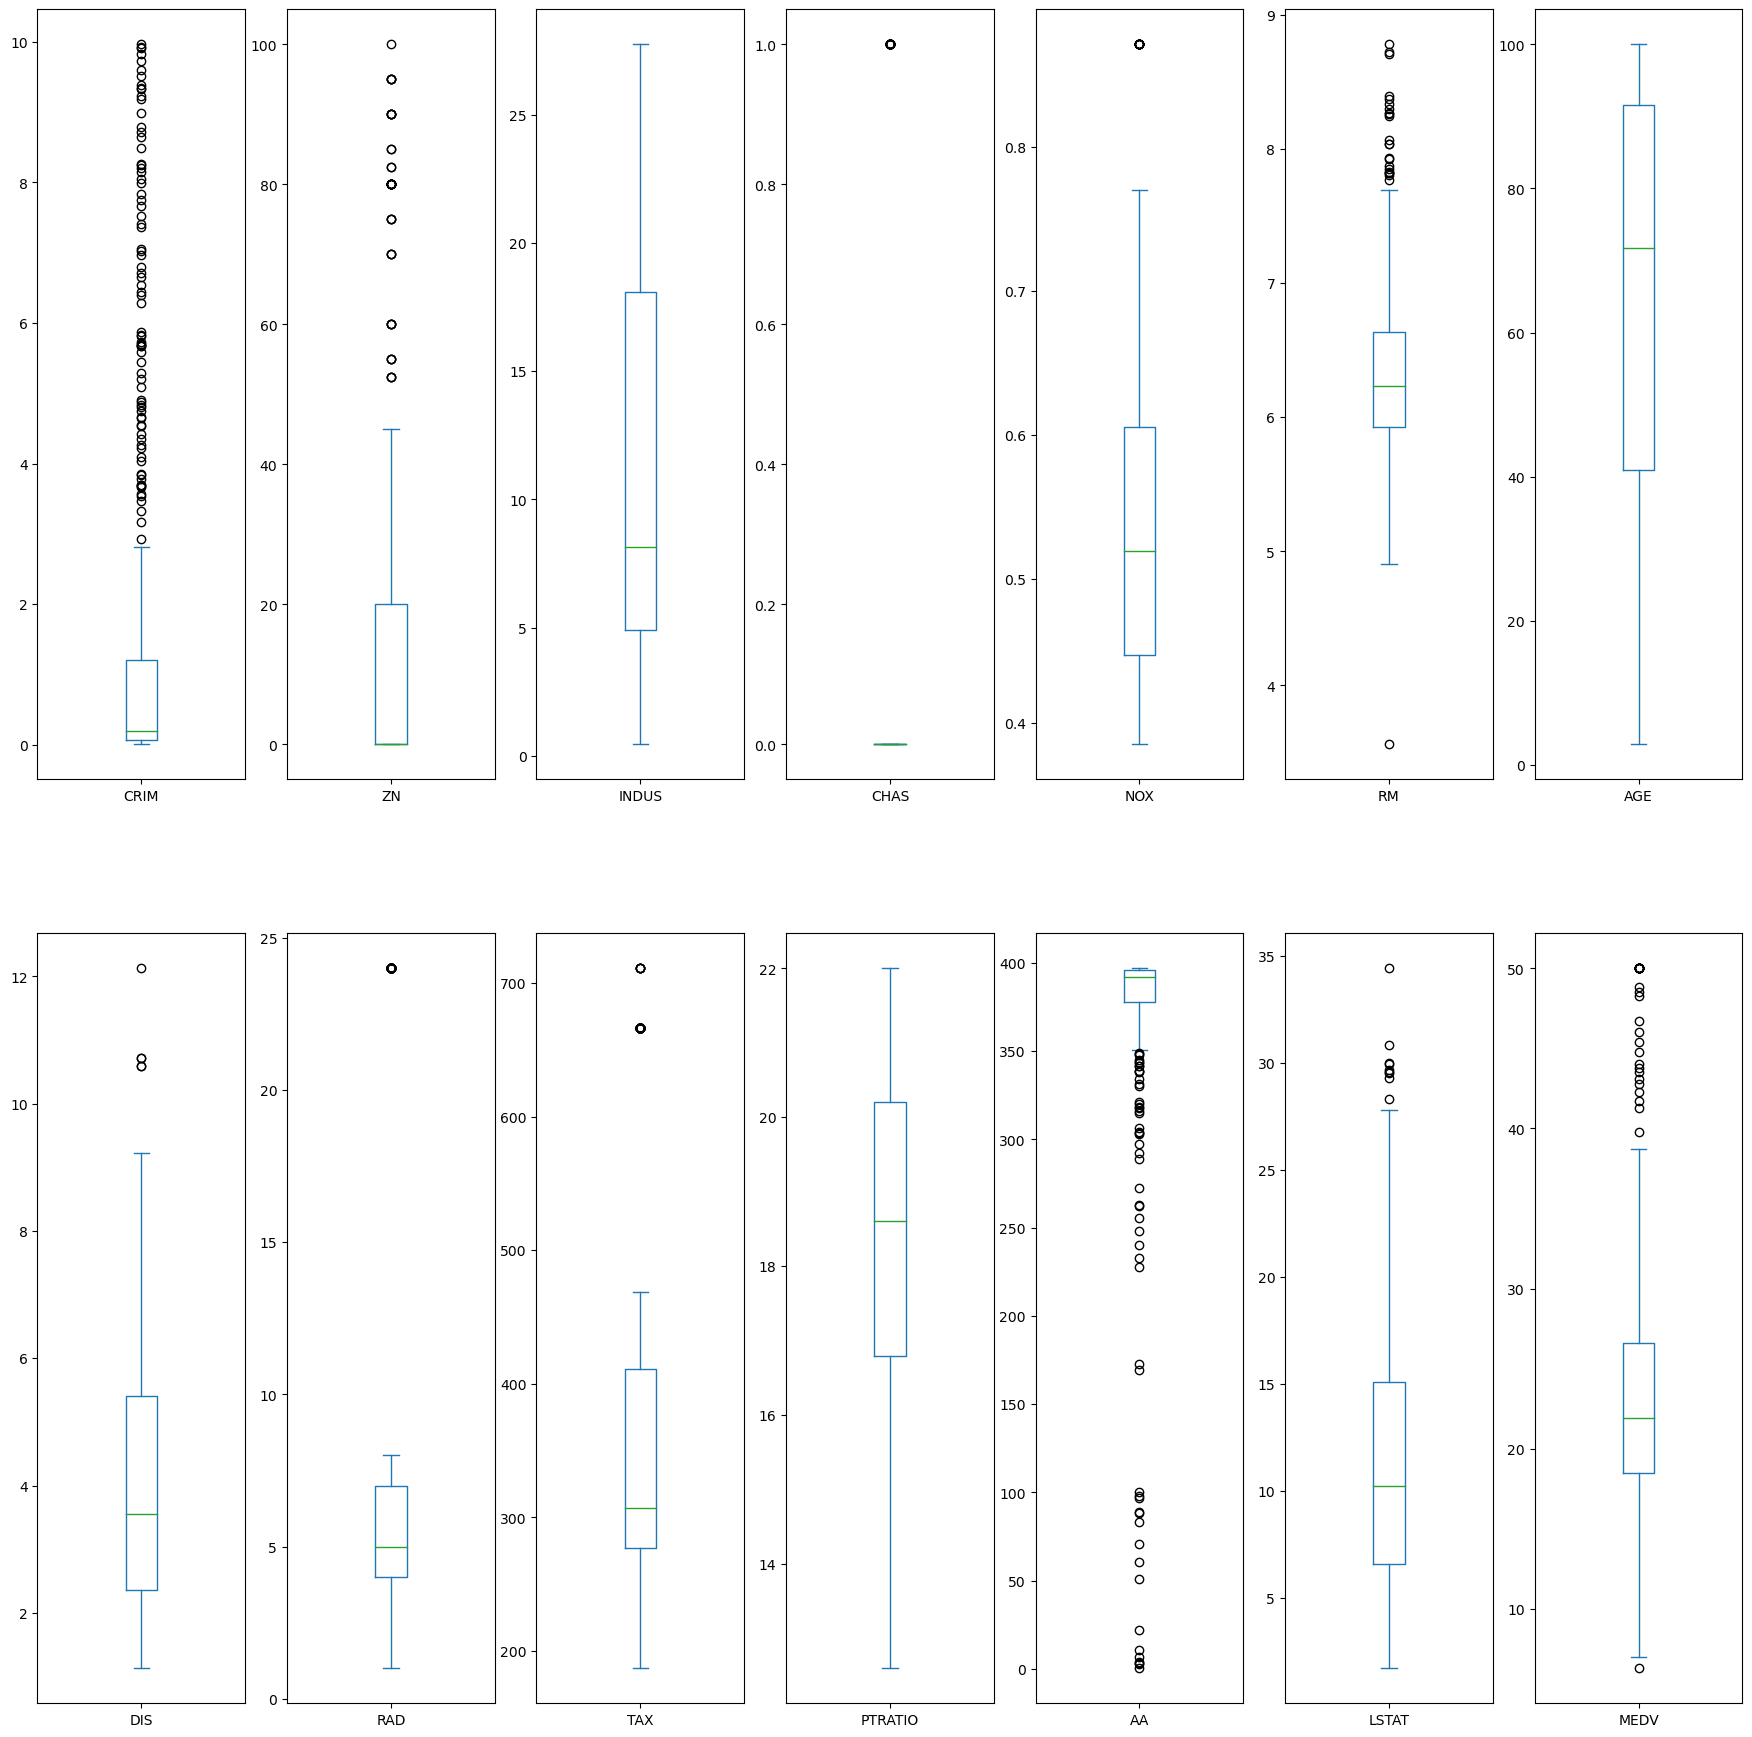

In [241]:
df.plot(kind="box", subplots=True, layout=(2,7), sharex=False, figsize=(22,22))
plt.show()

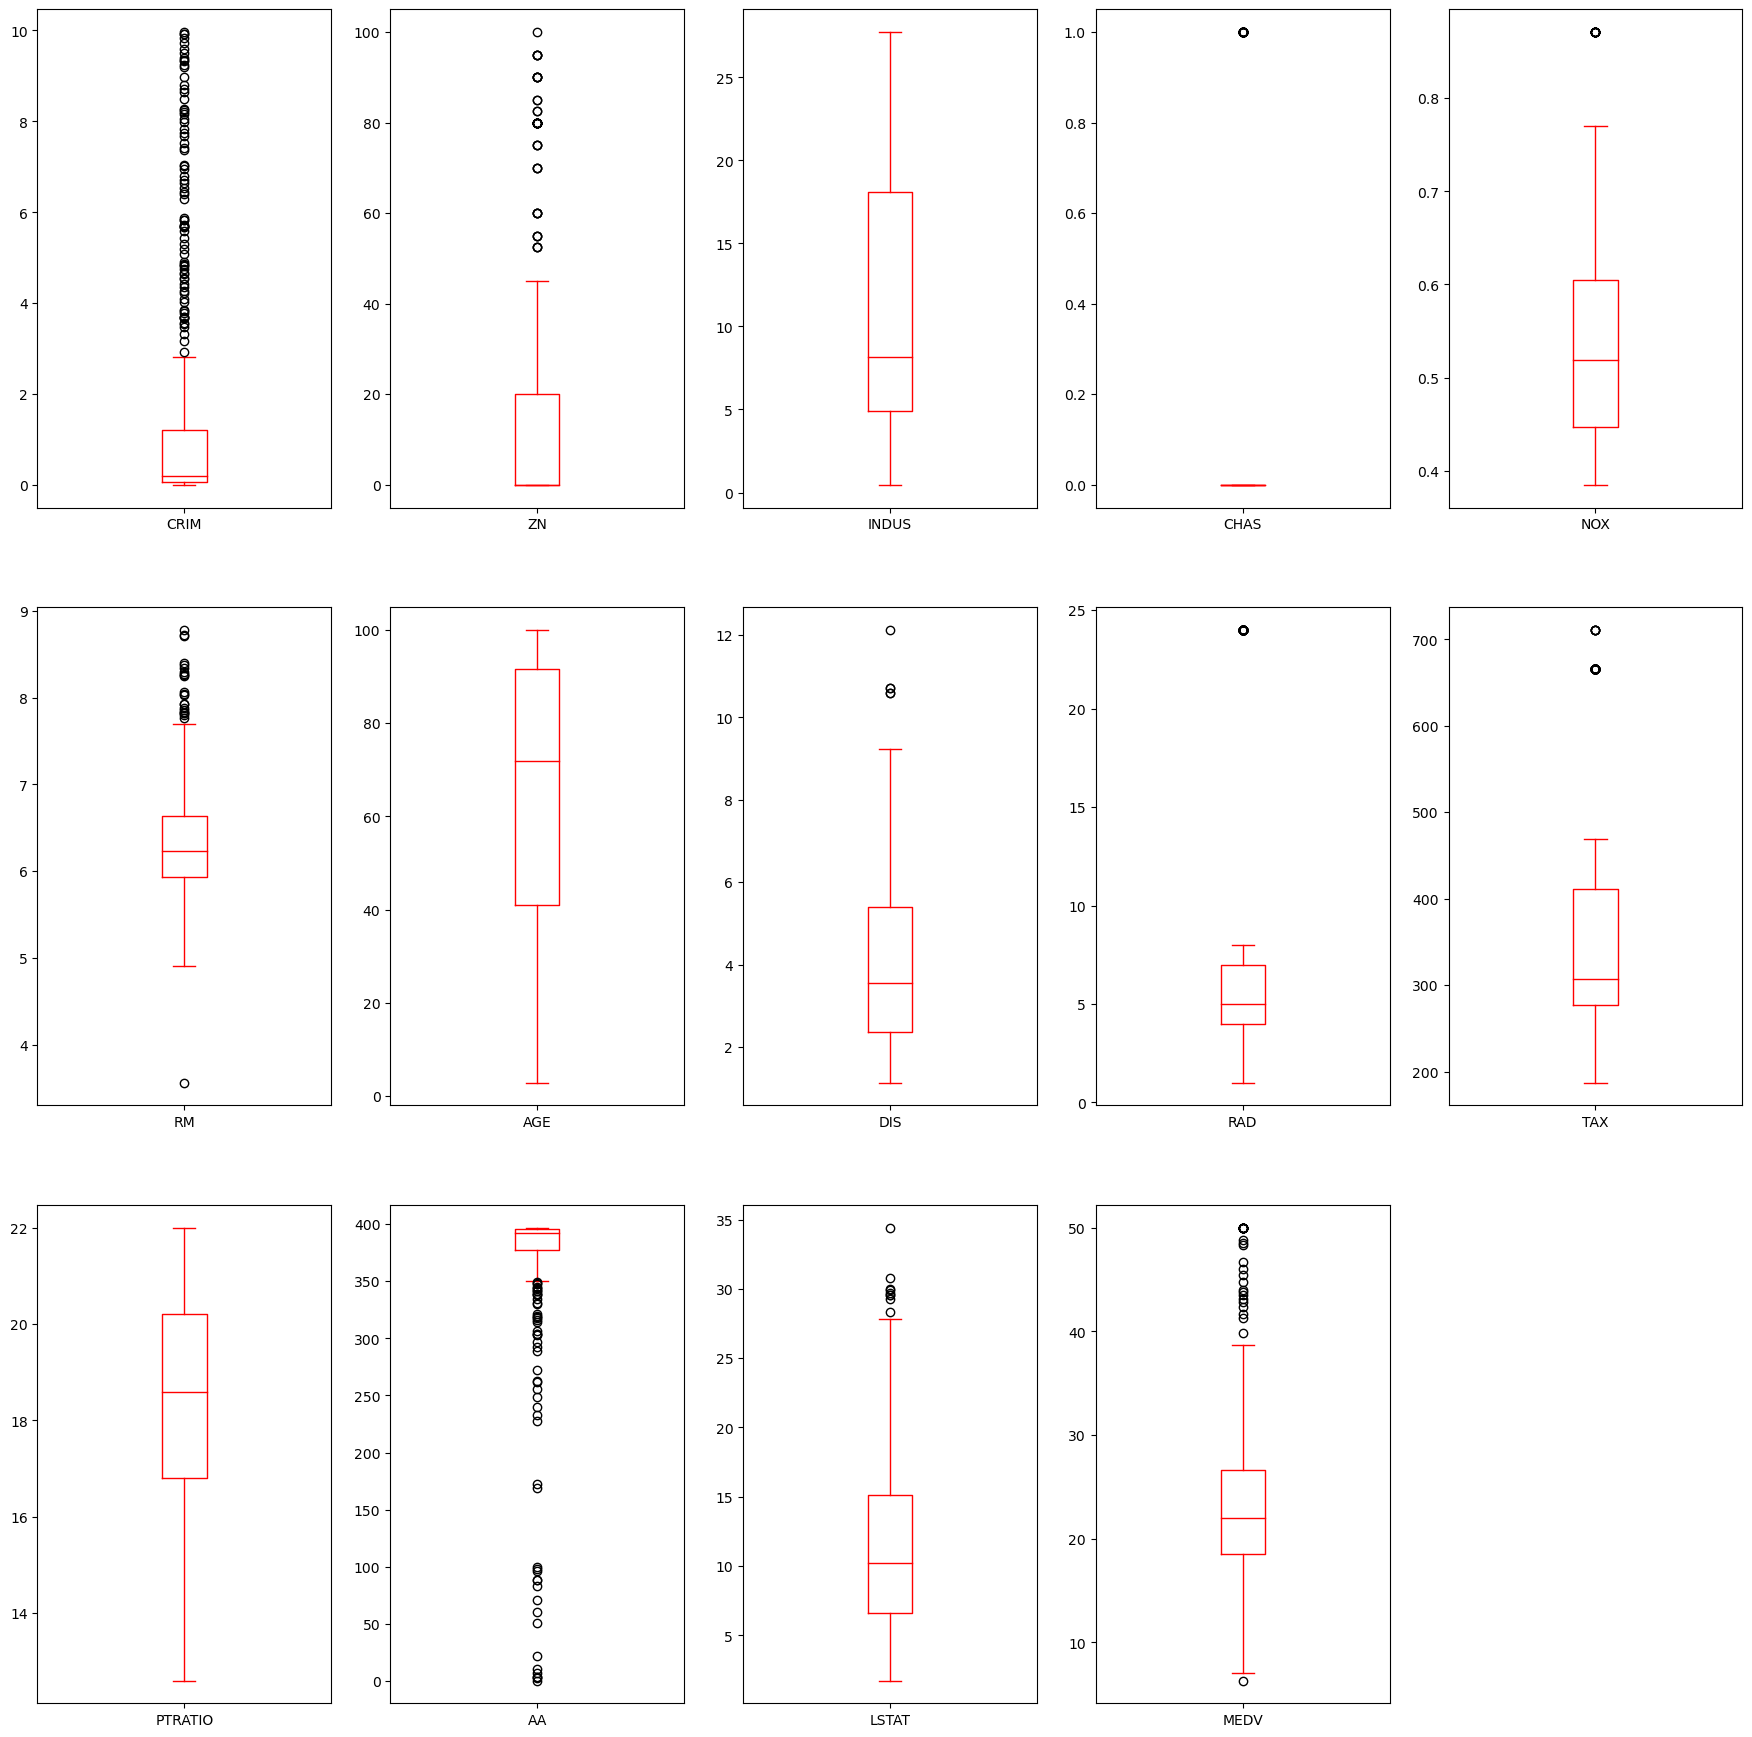

In [242]:
df.plot(kind="box", subplots=True, layout=(3,5), sharex=False, figsize=(22,22), color ='red')
plt.show()

## Correlation Analysis and Feature Selection

## Correlations

In [243]:
# We will decrease the number of decimal places with the format function
pd.options.display.float_format = '{:,.3f}'.format

In [244]:
# Here we will get the correlations, with only 3 decimals.
df.corr()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.281  0.574  0.050  0.637 -0.142  0.448 -0.462  0.898  0.826   
ZN      -0.281  1.000 -0.514 -0.060 -0.501  0.307 -0.556  0.656 -0.267 -0.269   
INDUS    0.574 -0.514  1.000  0.103  0.739 -0.365  0.606 -0.669  0.513  0.673   
CHAS     0.050 -0.060  0.103  1.000  0.134  0.077  0.123 -0.141  0.057  0.017   
NOX      0.637 -0.501  0.739  0.134  1.000 -0.265  0.707 -0.746  0.542  0.615   
RM      -0.142  0.307 -0.365  0.077 -0.265  1.000 -0.188  0.139 -0.096 -0.215   
AGE      0.448 -0.556  0.606  0.123  0.707 -0.188  1.000 -0.720  0.359  0.427   
DIS     -0.462  0.656 -0.669 -0.141 -0.746  0.139 -0.720  1.000 -0.388 -0.444   
RAD      0.898 -0.267  0.513  0.057  0.542 -0.096  0.359 -0.388  1.000  0.873   
TAX      0.826 -0.269  0.673  0.017  0.615 -0.215  0.427 -0.444  0.873  1.000   
PTRATIO  0.319 -0.364  0.317 -0.100  0.103 -0.334  0.193 -0.152  0.387  0.385   
AA      -0.413  0.150 -0.317  0.013 -0.358  0.108 -0.224  0.234 -0.353 -0.367   
LSTAT    0.425 -0.411  0.565 -0.009  0.537 -0.607  0.573 -0.424  0.310  0.411   
MEDV    -0.286  0.332 -0.412  0.154 -0.333  0.740 -0.300  0.139 -0.218 -0.346   

         PTRATIO     AA  LSTAT   MEDV  
CRIM       0.319 -0.413  0.425 -0.286  
ZN        -0.364  0.150 -0.411  0.332  
INDUS      0.317 -0.317  0.565 -0.412  
CHAS      -0.100  0.013 -0.009  0.154  
NOX        0.103 -0.358  0.537 -0.333  
RM        -0.334  0.108 -0.607  0.740  
AGE        0.193 -0.224  0.573 -0.300  
DIS       -0.152  0.234 -0.424  0.139  
RAD        0.387 -0.353  0.310 -0.218  
TAX        0.385 -0.367  0.411 -0.346  
PTRATIO    1.000 -0.090  0.303 -0.461  
AA        -0.090  1.000 -0.291  0.265  
LSTAT      0.303 -0.291  1.000 -0.706  
MEDV      -0.461  0.265 -0.706  1.000

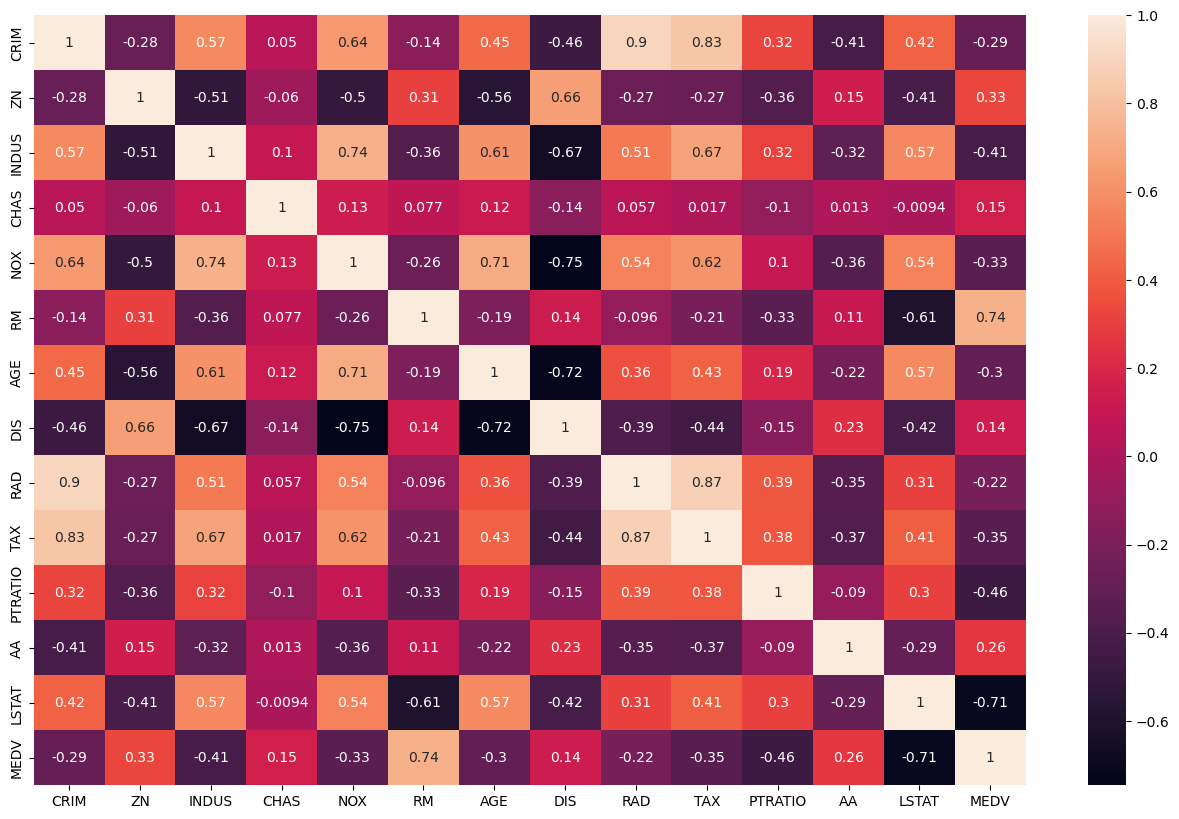

In [245]:
# We could simply look at the correlations but a heatmap is a great way to present to the general audience.
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## <span style= 'color:red'> 18. What are the top three variables that impact the target variable (MEDV)?  Remember, the most impactful can be either a positive or a negative value.  Enter your answer by adding a new code block and use markdown.  </span>

According to the heatmap above, the top three (3) variable that impact the target variable (MEDV) are as follows: RM, LSAT, and PTRATIO.

In [246]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.
df2= df[['CRIM','INDUS', 'TAX','MEDV']]

In [247]:
#df4= df[['ZN','CHAS', 'NOX','DIS']]

In [248]:
#df5 = df[["LSTAT", "RM", 'RAD', "AGE"]]

In [249]:
#df4.corr()

In [250]:
#df5.corr()

## <span style= 'color:red'> 19. What is happening with the code df2.corr ()?  Enter your answer by adding a new code block and use markdown. </span>

With the df2.corr(), we are able to the the correlations between four, previously specificed variables. 

In [251]:
df2.corr()

CRIM  INDUS    TAX   MEDV
CRIM   1.000  0.574  0.826 -0.286
INDUS  0.574  1.000  0.673 -0.412
TAX    0.826  0.673  1.000 -0.346
MEDV  -0.286 -0.412 -0.346  1.000

### Creating a Pair Plot

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


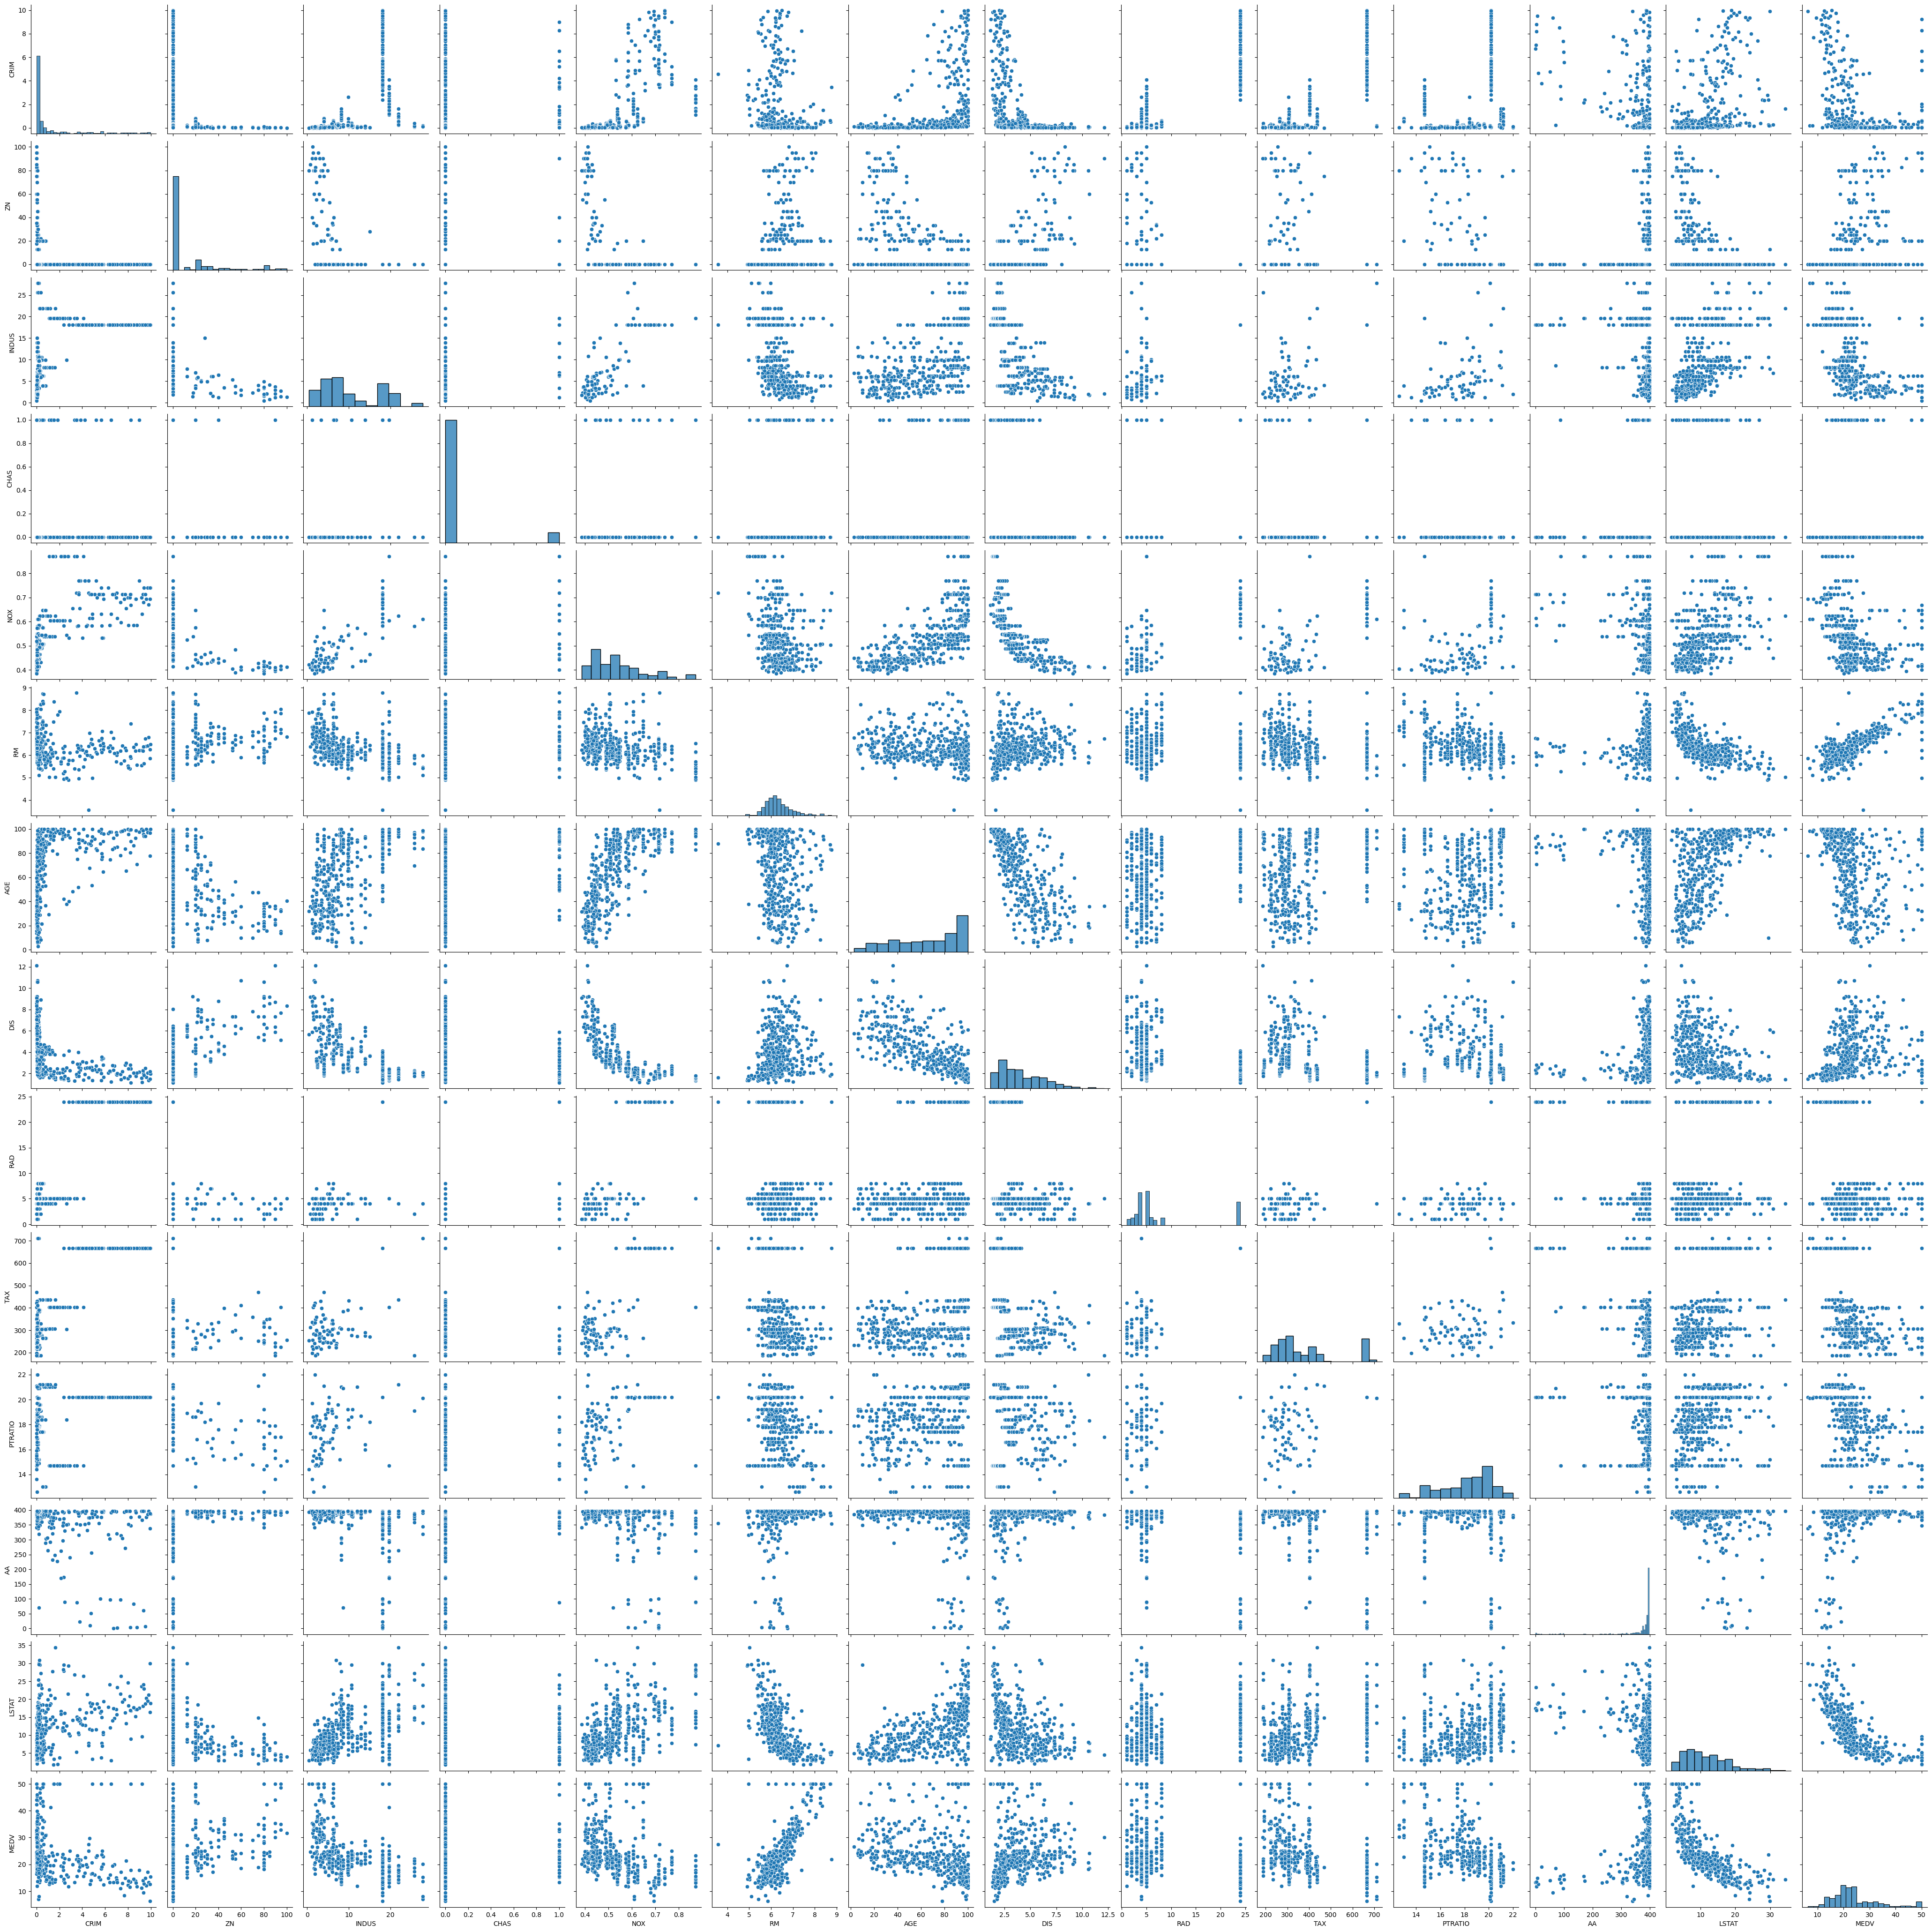

In [252]:
# Let's illustrate the correlations using color.   
sns.pairplot(df,height=3, aspect= 1);

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


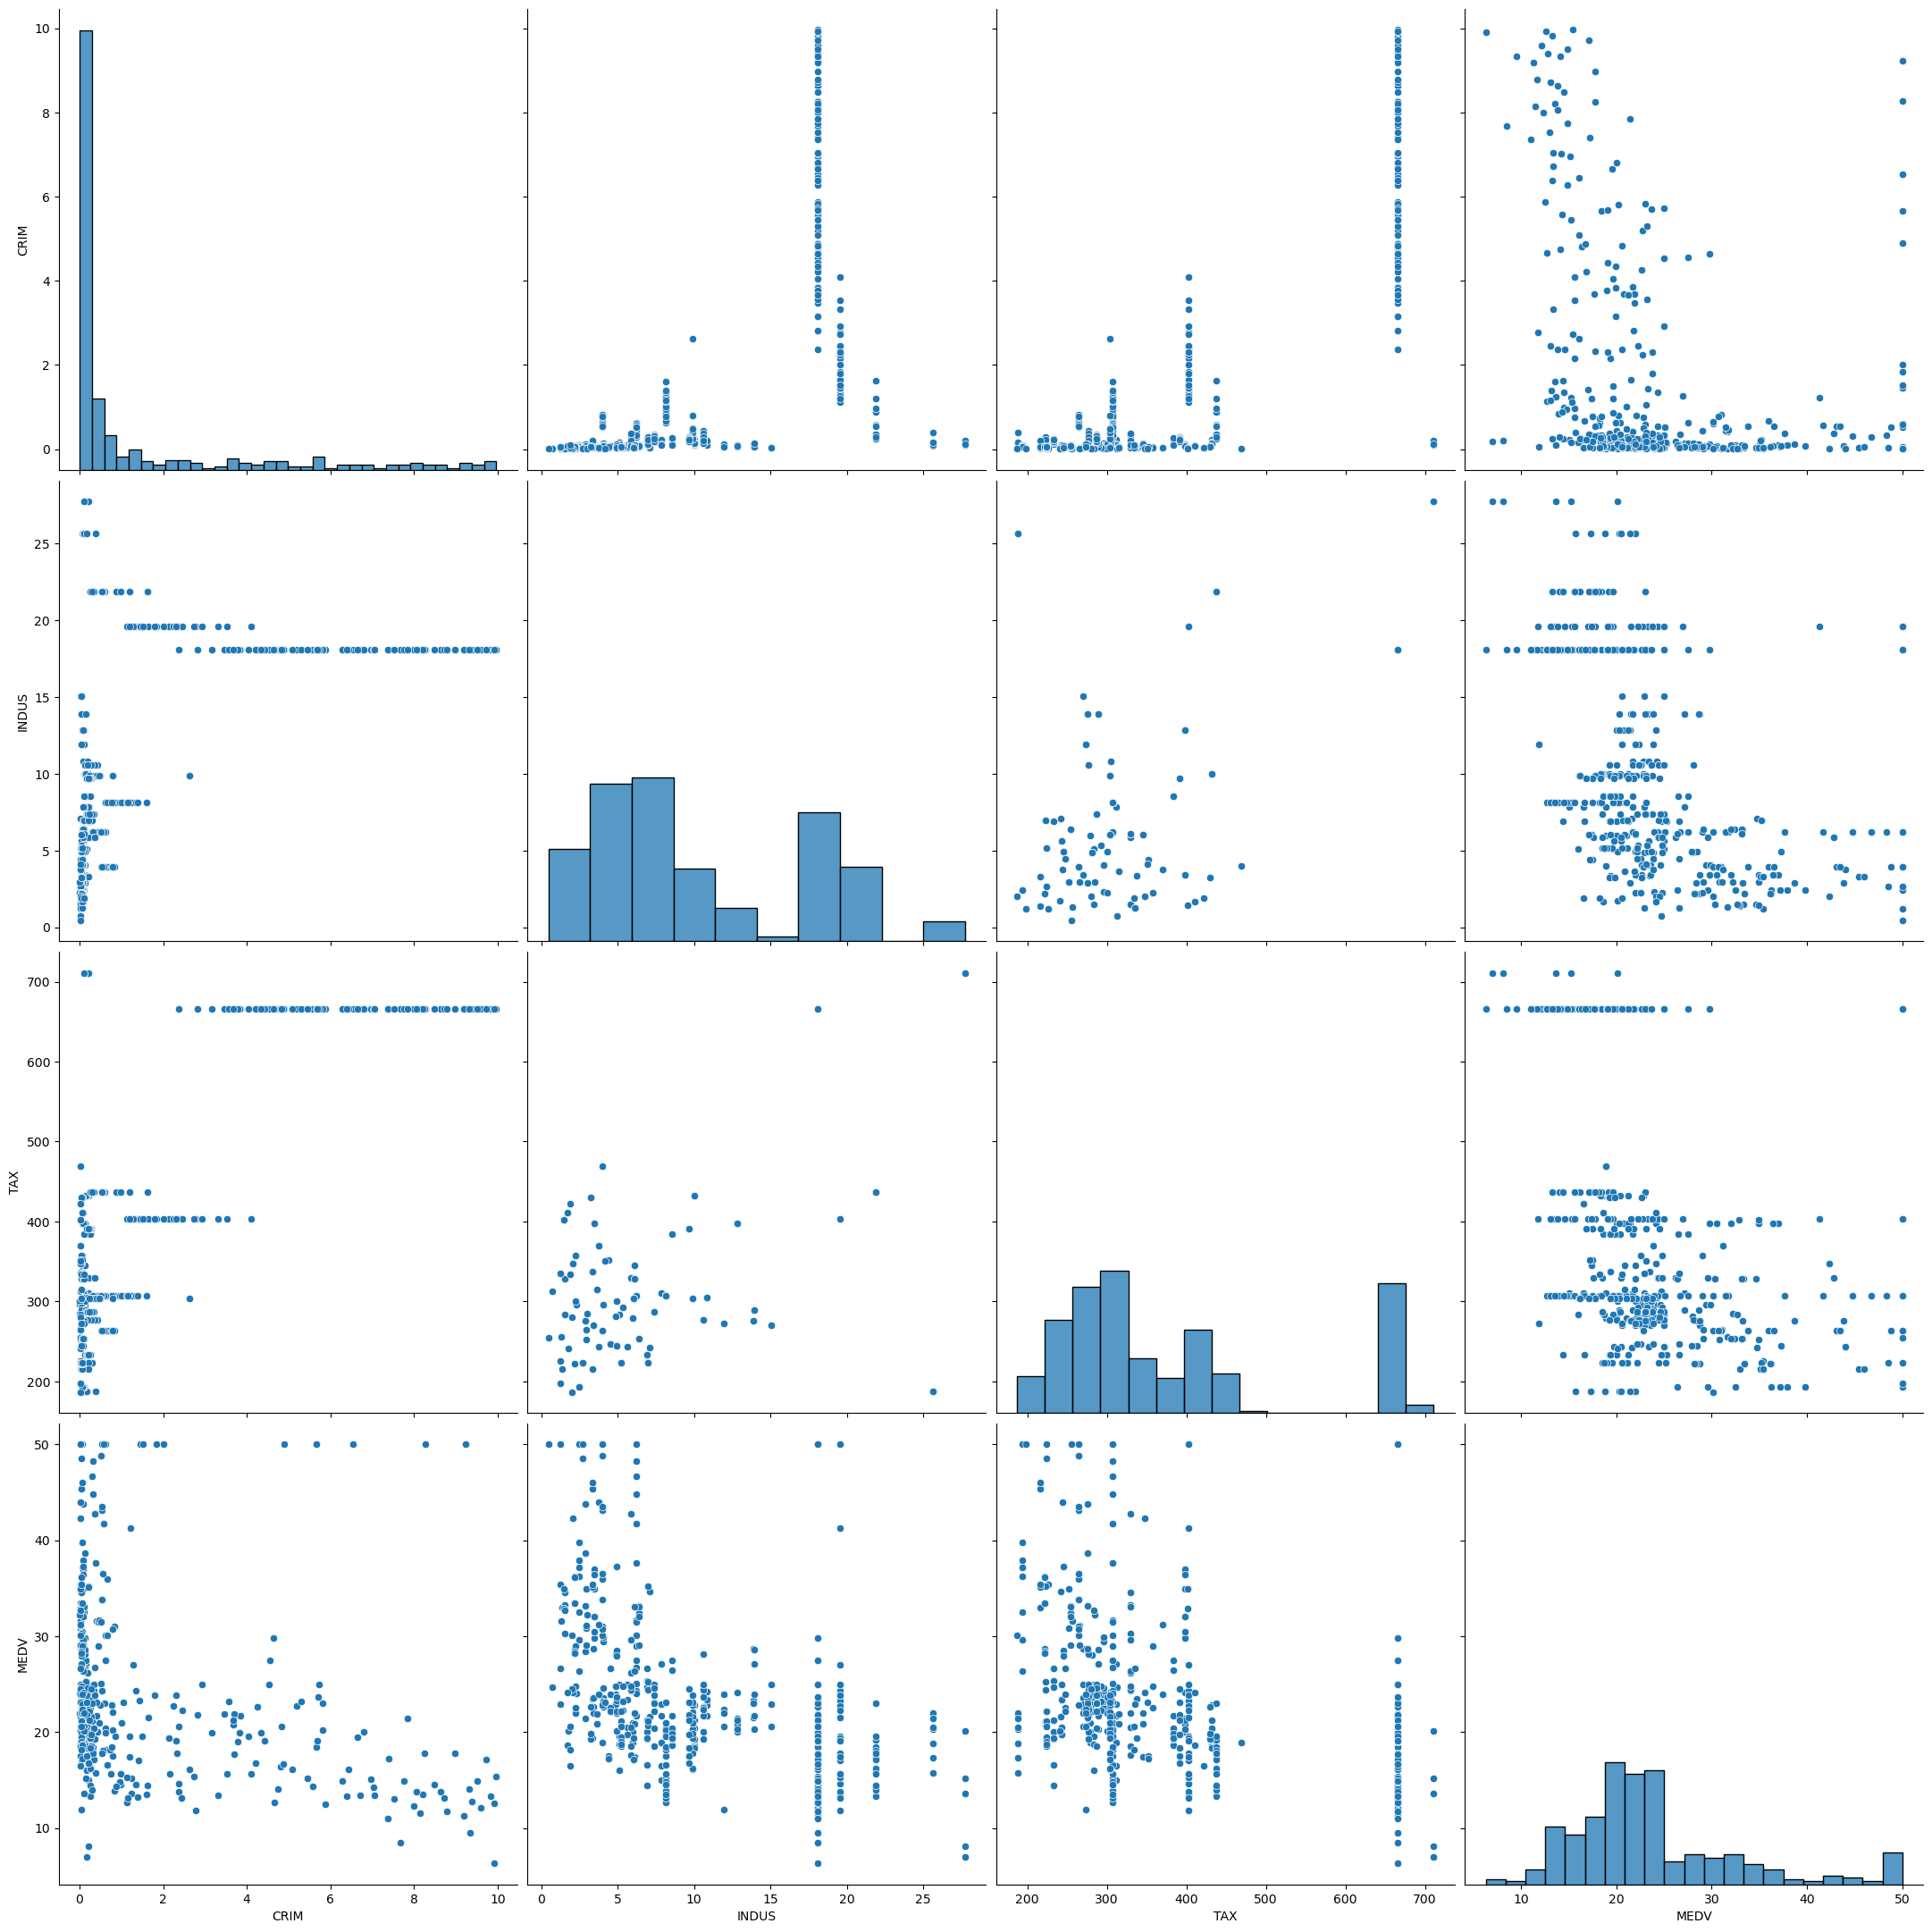

In [253]:
# Let's try the pairplot with only the variables in df2
sns.pairplot(df2, height=5.5);
plt.show()

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


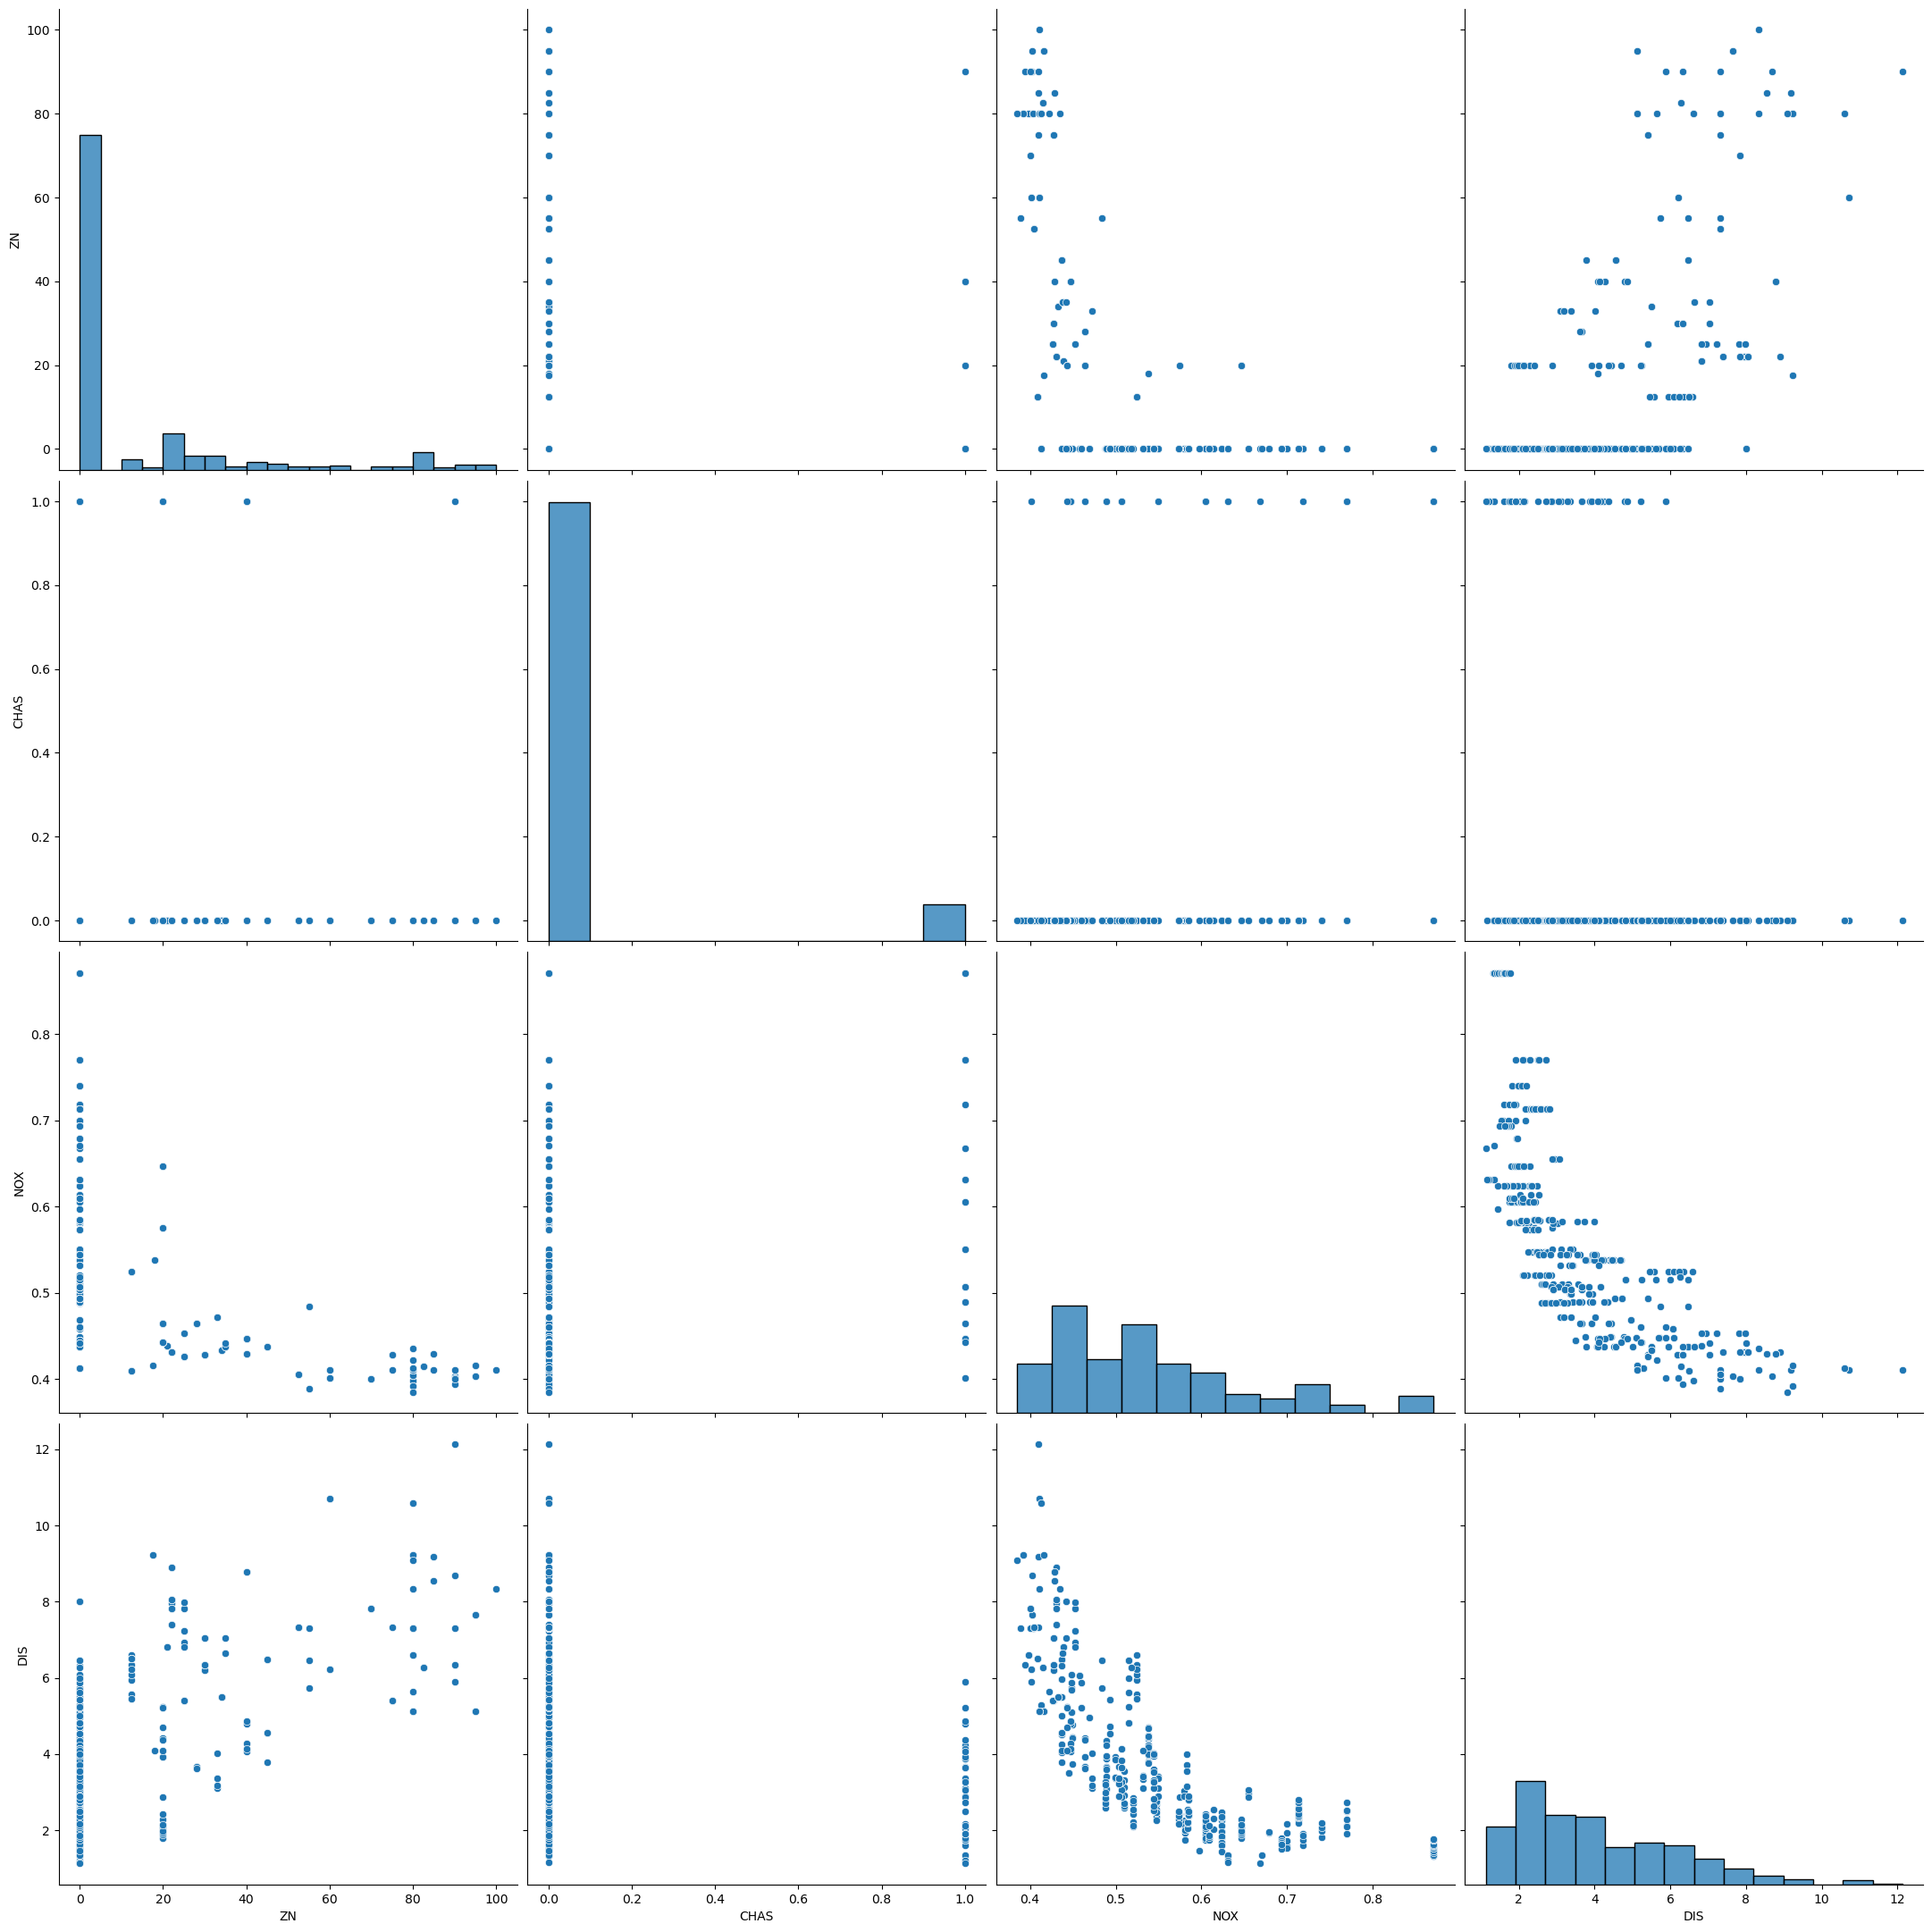

In [254]:
sns.pairplot(df4, height=5.5);
plt.show()

### Creating a Heat Map

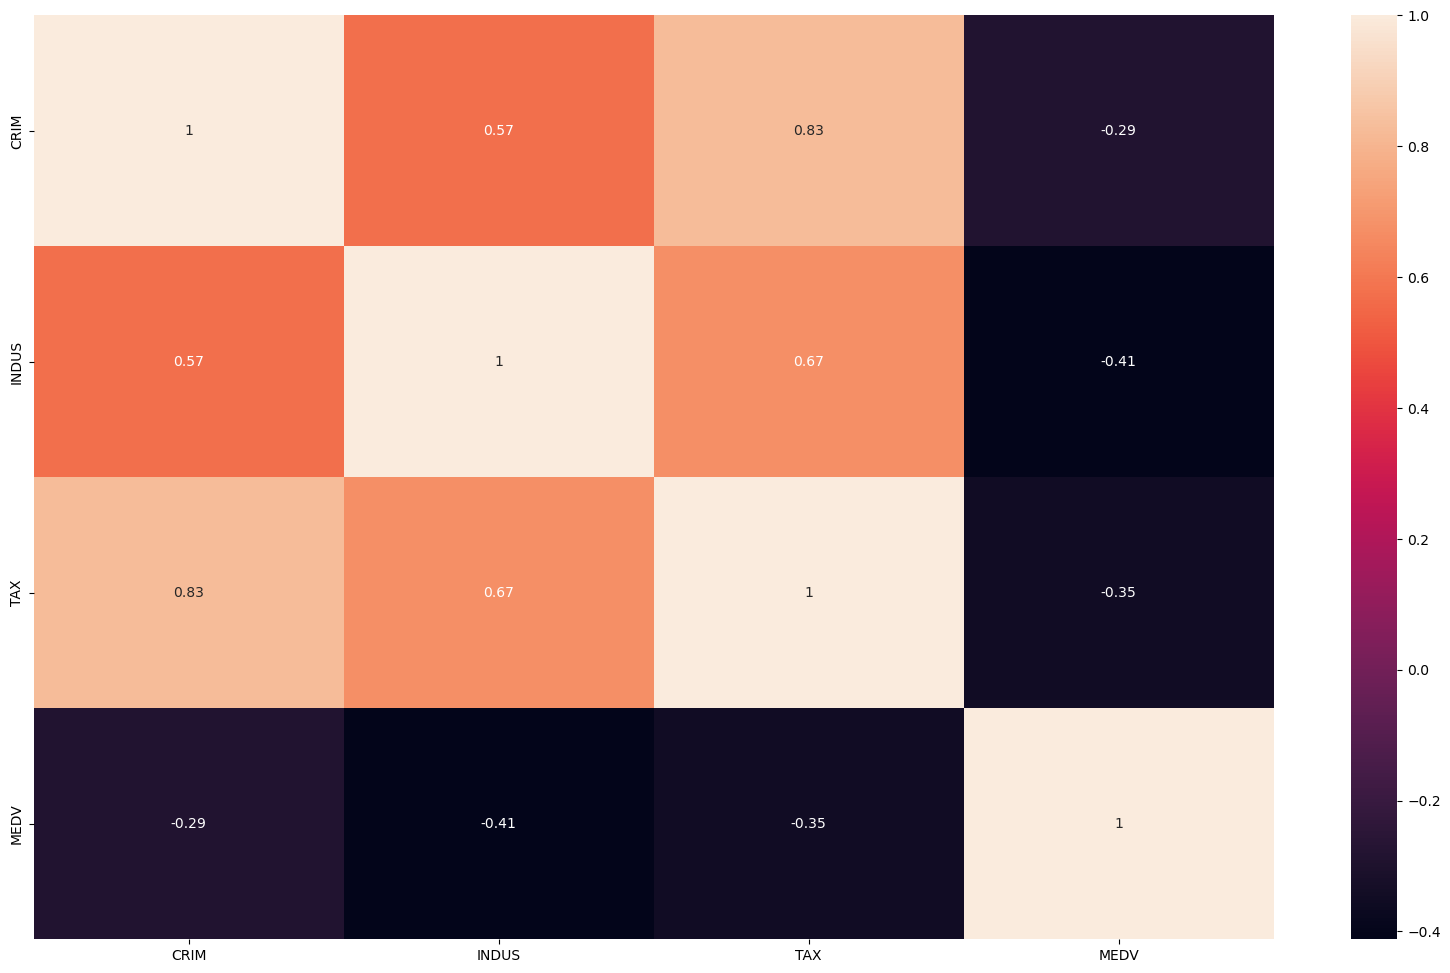

In [255]:
# Now we will make a heatmap with only the variables in df2 subset.  Again, it is very important to understand this for the final.plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

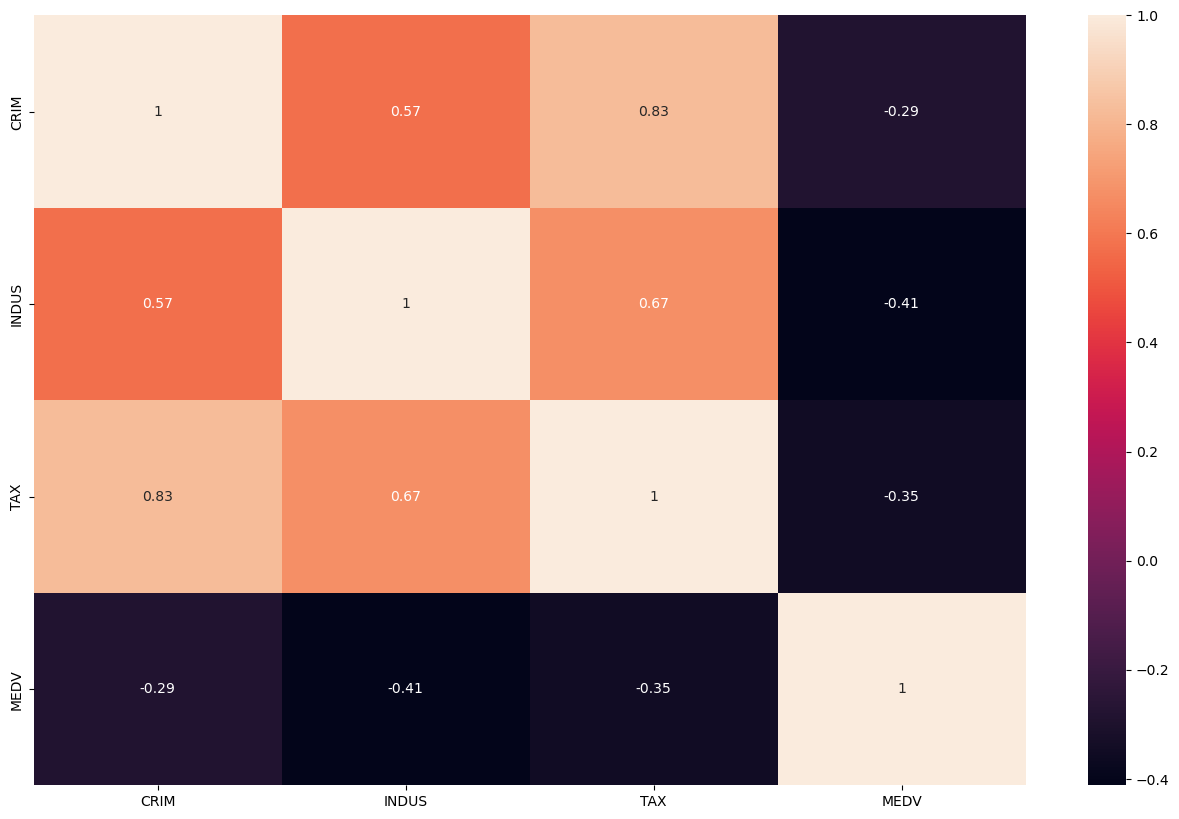

In [256]:
plt.figure(figsize = (16,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

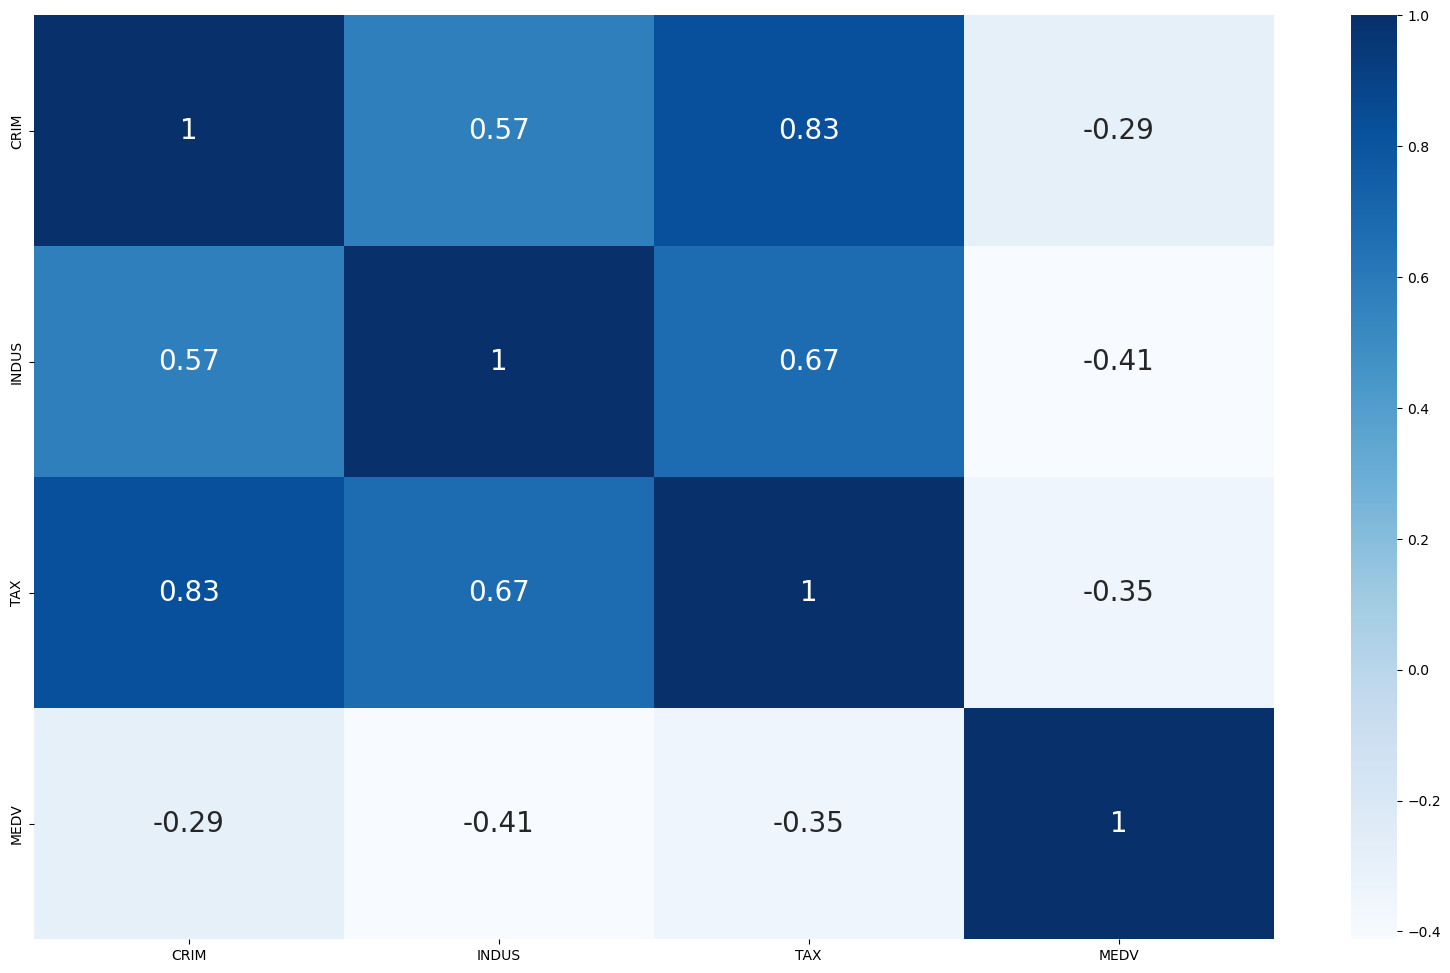

In [257]:
#If you want to change the color and font, to make the labels easier to read, use this code.
plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

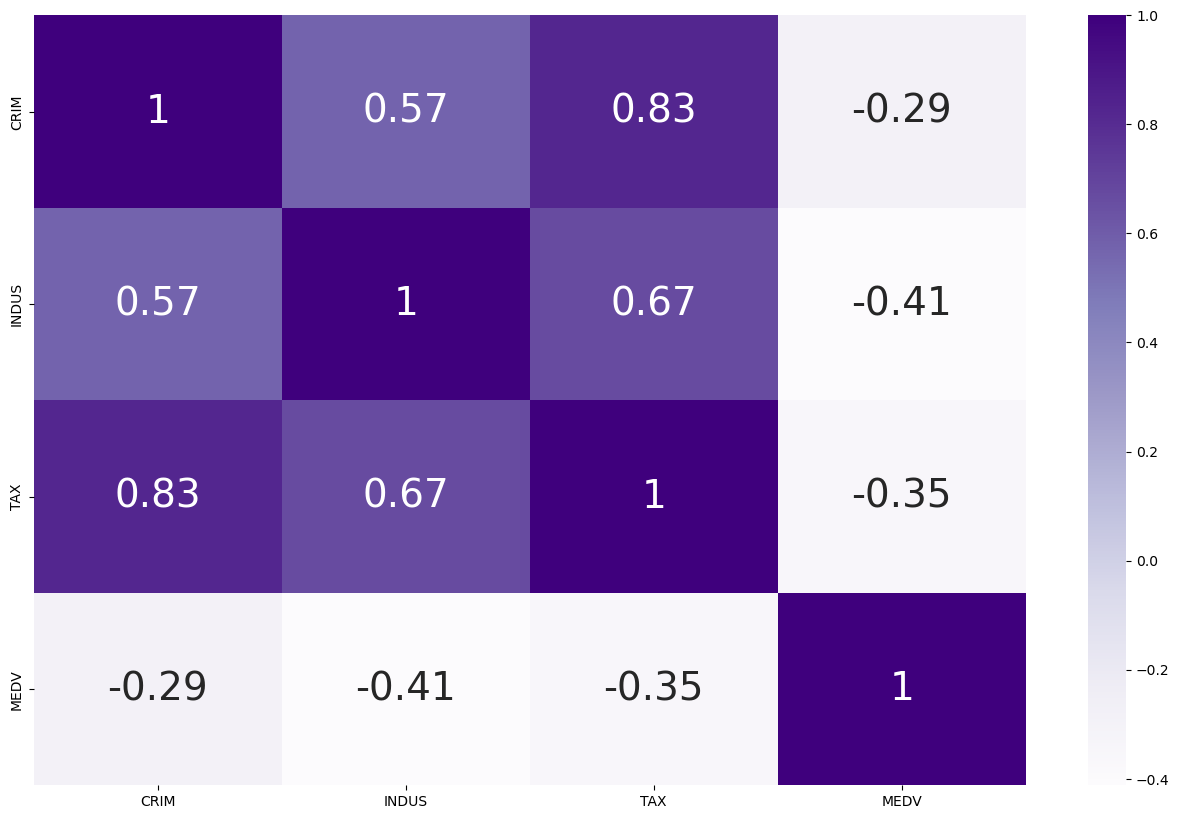

In [258]:
plt.figure(figsize =(16,10))
sns.heatmap(df2.corr(), cmap="Purples", annot=True, annot_kws={"fontsize":28})
plt.show()

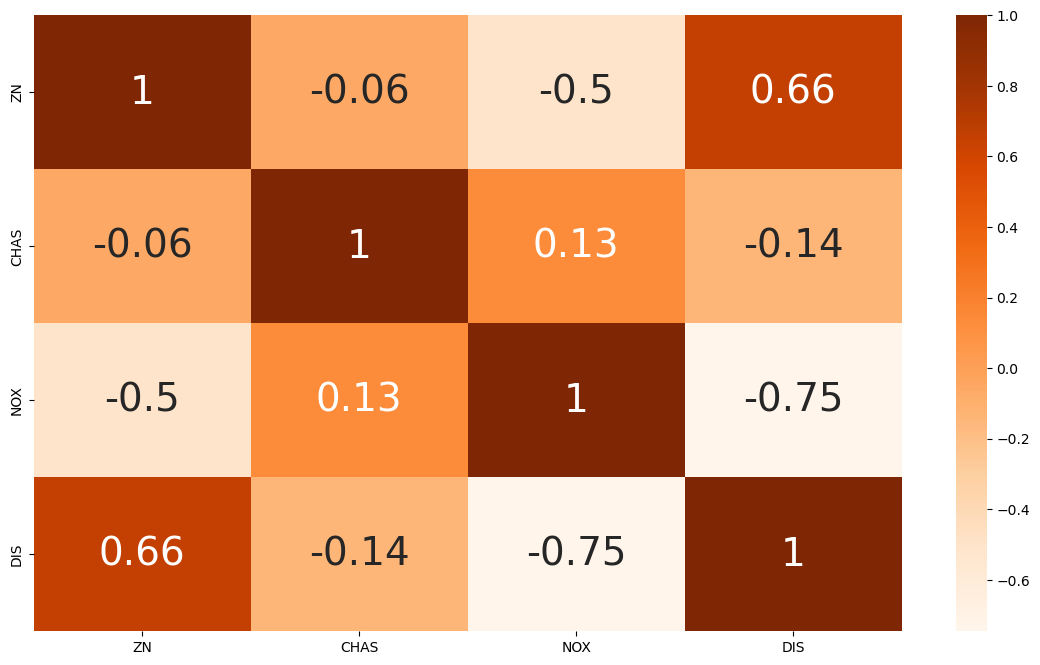

In [259]:
plt.figure(figsize =(14,8))
sns.heatmap(df4.corr(), cmap="Oranges", annot=True, annot_kws={"fontsize":28})
plt.show()

### Separate the Dataset into Input & Output NumPy Arrays

In [328]:
#import train test split library
from sklearn.model_selection import train_test_split

In [329]:
array = df.values
X = array [:, 0:3]
Y = array [:, 3]

In [330]:
# Store the dataframe values into a numPy array
array2 = df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X2 = array2 [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)
Y2 = array2 [:,3]

In [331]:
array3 =df3.values
X3 = array3 [:, 0:3]
Y3 = array3 [:,3]

In [332]:
array4 = df4.values
X4 = array4 [:, 0:3]
Y4 = array4 [:,3]

In [350]:
array5 = df5.values
X5 = array5 [:, 0:3]
Y5 = array5 [:,3]

## <span style= 'color:red'> 20. What would the X array be if we wanted to include all rows and wanted 5 variables instead of 3 (see above)?  Of course, this would be from the df not df2 since there are not 5 variable in the df2 dataframe.  Enter your answer by adding a new code block and use markdown.  </span>

#Store the dataframe values into a numPy array
array = df2.values

#Separate the array into input and output components by slicing (you used this in your homework)
#For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:5]

#For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array [:,5]

### Spilt into Input/Output Array into Training/Testing Datasets

In [351]:
# Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [352]:
# Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X2_train, X2_test, Y2_train, Y2_test= train_test_split(X2,Y2, test_size=0.2, random_state=seed)

In [353]:
#Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X3_train, X3_test, Y3_train, Y3_test= train_test_split(X3,Y3, test_size=0.2, random_state=seed)

In [354]:
#Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X4_train, X4_test, Y4_train, Y4_test= train_test_split(X4,Y4, test_size=0.2, random_state=seed)

In [355]:
seed = 7
X5_train, X5_test, Y5_train, Y5_test= train_test_split(X5,Y5, test_size=0.2, random_state=seed)

## <span style= 'color:red'> 21. In the above code, do you know what code tells the model that we want a test sub-dataset of 20%?  Enter your answer by adding a new code block and use markdown.  </span>

test_size=0.2

### Build and Train the Model

## <span style= 'color:red'> 22. From the code block below, what is the algorithm we are using for the model?  Enter your answer by adding a new code block and use markdown.  </span>

From the code block below, we are using a linear regression algorithm. 

## <span style= 'color:red'> 23. What does the intercept and coefficients tell us?  Enter your answer by adding a new code block and use markdown.  </span>

The intercept and coefficients tell us the following things: (1) the intercept is the dependent value, while (2) the coefficient is how much the dependent variable may change in relationship (i.e., indirect or direct) to the dependent variable.

In [356]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X_train, Y_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 0.051536287244138175
Coefficients: [-0.00321736 -0.00048543  0.00445612]


In [357]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X2_train, Y2_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 31.393427670412944
Coefficients: [ 0.09859287 -0.42388844 -0.00931847]


In [358]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X3_train, Y3_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 9.089625122452588
Coefficients: [  0.03494433  -0.27002996 -10.0905047 ]


In [359]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X4_train, Y4_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 9.089625122452588
Coefficients: [  0.03494433  -0.27002996 -10.0905047 ]


In [360]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X5_train, Y5_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: -40.29293210832023
Coefficients: [ 3.15007359 10.39506683  0.59226613]


In [361]:
# If we want to print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients
names_2 = ["CRIM", "INDUS", "TAX"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set
coeffs = set(coeffs_zip)

# Print (coeffs)
for coef in coeffs:
    print (coef, "\n")

('TAX', 0.5922661339380486) 

('INDUS', 10.395066825931632) 

('CRIM', 3.1500735905124757) 



In [362]:
names_2 = ["LSAT", "PTRATIO", "AGE"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set
coeffs = set(coeffs_zip)

# Print (coeffs)
for coef in coeffs:
    print (coef, "\n")

('PTRATIO', 10.395066825931632) 

('AGE', 0.5922661339380486) 

('LSAT', 3.1500735905124757) 



In [363]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

### Calculate R-Squared

In [364]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  -1754759.4724955058


In [365]:
R_squared = model.score(X2_test, Y2_test)
print("R-squared: ", R_squared)

R-squared:  -1320.5208926268292


In [366]:
R_squared = model.score(X3_test, Y3_test)
print("R-squared: ", R_squared)

R-squared:  -1533.424656132192


In [367]:
R_squared = model.score(X4_test, Y4_test)
print("R-squared: ", R_squared)

R-squared:  -1533.424656132192


In [368]:
R_squared = model.score(X5_test, Y5_test)
print("R-squared: ", R_squared)

R-squared:  0.3934072241341423


### Notes: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tell us how good the independent variables predict the dependent variable.  This is very low.  Think about how you could increase the R-squared. What variables would you use?  This will be important for the final.

## Prediction

In [369]:
# CRIM = 12
# INDUS = 10
# TAX = 450
model.predict([[12,10,450]])

array([367.97837951])

In [371]:
# CRIM 15; INDUS = 15; TAX = 300
model.predict([[15,15, 300]])

array([340.56401432])

## <span style= 'color:red'> 24. What is the predicted amount of the home with the variables and values you have entered above? Enter your answer by adding a new code block and use markdown. You can look up in the description for the dataset at the beginning of the assignment to refresh your memory, if needed.  </span>

$340,000?

In [275]:
# CRIM = 2
# INDUS = 30
# TAX = 50
model.predict([[2,30,50]])

array([-503.46661987])

## <span style= 'color:red'> 25. What is the predicted amount of the home with the variables and values you have entered above? Enter your answer by adding a new code block and use markdown. </span>

## Evaluate/Validate Algorithm/Model, Using K-Fold Cross Validation

In [276]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -64.35862748210984


In [277]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -1.501318215148419


In [372]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -1.501318215148419


In [376]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X4, Y4, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -1.501318215148419


In [378]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X5, Y5, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -481.4034301912253


In [379]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 5
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X5, Y5, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -485.7203633512222


Interesting hows the mean squared error increased to decreasing the k-fold.

### Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see there is a -64 avg of all error (mean of square errors). This value would traditionally be a positive value but scikit reports this value as a negative value. If the square root would have been evaluated, the value would have been around 8.

In [381]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: -0.010858697223003588


In [382]:
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.19023822025958675


In [383]:
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.6619451728833676


In [384]:
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X4, Y4, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.6619451728833676


In [386]:
# Specify the K-size
num_folds = 5
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X4, Y4, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.6562473219636169


In [387]:
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X5, Y5, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.39233723118364866


### In the above code we are using a different scoring parameter.  Here we use the Explained Varience.  Best possible score is 1.0, lower values are worse.

#### To learn more about Scikit Learning scoring [https://scikit-learn.org/stable/modules/model_evaluation.html]

## <span style= 'color:red'> 26. What are your thoughts on this process?  Do you have any quesitons? Enter your answer by adding a new code block and use markdown.  </span>

I was unsure if calculated  the amount of the house with the given variables for question #24. May you please provided a brief explanation of how the amount/value would be calculated?

As I split the the dataset into more numpy arrays (e.g., array3, array4, and array5), build and trained models, and calculated the R-squared values respectively, I notices that some values replicated themselves. Do you know why that is? Did may a mistake in question somewhere between questions 20 and 23?